#LSTM

1. Running the cities’ panel data once:
Train one LSTM model using all cities' time series data, treating it as a combined dataset

2. Looping throughout the model for each cities:
Train a separate LSTM model for each cities’s time series data.

Spitting method: splitting data for each city individually with sequential Splitting then concatenate each individually train/test dataset respectively


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import seaborn as sns
sns.set()

In [4]:
path="/content/drive/MyDrive/Capstone project HW/Model/Water consumption/Water_Final_data.xlsx"
df = pd.read_excel(path)

In [5]:
df.head()

,City,lat,long,Date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,...,Total Raw water Consumption Points (KL),Total Rain water (KL),Deviation,Municipal water (Surface),Fresh Surface water,Groundwater renewable,Third Party Source,No of Employees,No of Seats,anomaly_score
0,bangalore city,2.637027,4.364303,2016-04-01,3.340452,3.523526,3.119532,2.049194,3.881071,3.187264,...,23188.845,0.000,-3.26,0.0,0.00000,3124.465,21799.4,0.0,0.0,1
1,bangalore city,2.637027,4.364303,2016-05-01,3.262509,3.436217,3.091963,2.256329,3.581870,3.176887,...,23188.845,398.925,55.12,0.0,212.59719,3124.465,21799.4,0.0,0.0,1
2,bangalore city,2.637027,4.364303,2016-06-01,3.159116,3.276503,3.055765,2.703070,4.309226,2.836726,...,23188.845,398.925,54.68,0.0,212.59719,3124.465,21799.4,0.0,0.0,-1
3,bangalore city,2.637027,4.364303,2016-07-01,3.145799,3.288531,3.031838,2.651023,4.408579,2.762800,...,23188.845,398.925,82.13,0.0,212.59719,3124.465,21799.4,0.0,0.0,1
4,bangalore city,2.637027,4.364303,2016-08-01,3.173830,3.332760,3.050496,2.269246,4.356325,2.973266,...,23188.845,398.925,134.03,0.0,212.59719,3124.465,21799.4,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   City                                     1317 non-null   object        
 1   lat                                      1317 non-null   float64       
 2   long                                     1317 non-null   float64       
 3   Date                                     1317 non-null   datetime64[ns]
 4   temperature_2m_mean                      1317 non-null   float64       
 5   temperature_2m_max                       1317 non-null   float64       
 6   temperature_2m_min                       1317 non-null   float64       
 7   wind_speed_10m_mean                      1317 non-null   float64       
 8   cloud_cover_mean                         1317 non-null   float64       
 9   shortwave_radiation_sum                  

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
Column_to_use=['City','Date','No of Employees','No of Seats','Total Raw water Consumption Points (KL)',
               'temperature_2m_mean','temperature_2m_max','temperature_2m_min','wind_speed_10m_mean','cloud_cover_mean','shortwave_radiation_sum','precipitation_sum',
               'dew_point_2m_mean','pressure_msl_mean','soil_moisture_0_to_10cm_mean','et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']

new_data = df[Column_to_use]

In [9]:
new_data.shape

(1317, 17)

In [10]:
new_data.head()

,City,Date,No of Employees,No of Seats,Total Raw water Consumption Points (KL),temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,bangalore city,2016-04-01,0.0,0.0,23188.845,3.340452,3.523526,3.119532,2.049194,3.881071,3.187264,55.773994,2.856035,6.919145,0.253902,1.938608,4.007485
1,bangalore city,2016-05-01,0.0,0.0,23188.845,3.262509,3.436217,3.091963,2.256329,3.581870,3.176887,189.875270,3.082254,6.918665,0.304395,1.866260,4.349228
2,bangalore city,2016-06-01,0.0,0.0,23188.845,3.159116,3.276503,3.055765,2.703070,4.309226,2.836726,225.510470,3.073654,6.916953,0.381920,1.500943,4.482011
3,bangalore city,2016-07-01,0.0,0.0,23188.845,3.145799,3.288531,3.031838,2.651023,4.408579,2.762800,73.836250,3.036653,6.917324,0.332438,1.466955,4.440430
4,bangalore city,2016-08-01,0.0,0.0,23188.845,3.173830,3.332760,3.050496,2.269246,4.356325,2.973266,182.488450,3.086022,6.918428,0.362790,1.677774,4.456803


In [11]:
# Check for zero values in each column
zero_values = (new_data == 0).sum()

# Display columns that have zero values
zero_columns = zero_values[zero_values > 0]

# Print the columns with zero values and the number of zero values
print(zero_columns)

No of Employees                            403
No of Seats                                357
Total Raw water Consumption Points (KL)     57
precipitation_sum                           71
dtype: int64


In [12]:
#Check if any City does not have input values.
# List of columns to check for all 0 values
columns_to_check = ['No of Employees','No of Seats','Total Raw water Consumption Points (KL)']

# Filter rows where all the columns in columns_to_check have a value of 0
cities_with_all_zero_values = new_data[(new_data[columns_to_check] == 0).all(axis=1)]

# Display the rows with all values as 0 in the specified columns
cities_with_all_zero_values


,City,Date,No of Employees,No of Seats,Total Raw water Consumption Points (KL),temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
675,hyderabad city,2024-08-01,0.0,0.0,0.0,3.268363,3.377867,3.175726,2.788492,4.308273,2.697239,232.92732,3.144104,6.913248,0.275187,1.447896,4.414154


In [13]:
# Group by 'City' and aggregate to find the oldest and latest date, as well as the row count for each city
city_stats = new_data.groupby('City').agg(
    Oldest_Date=('Date', 'min'),
    Latest_Date=('Date', 'max'),
    Number_of_Rows=('Date', 'size')
)

# Print the oldest date, latest date, and the number of rows for each city
print(city_stats)


                    Oldest_Date Latest_Date  Number_of_Rows
City                                                       
bangalore city       2016-04-01  2024-08-01             101
bhubaneshwar city    2016-04-01  2024-08-01             101
chennai city         2016-04-01  2024-08-01             101
cochin (kochi) city  2016-04-01  2024-08-01             100
coimbatore city      2016-04-01  2024-08-01             101
delhi city           2016-04-01  2022-07-01              71
hyderabad city       2016-04-01  2024-08-01             101
kolkata city         2016-04-01  2024-07-01              97
manjaku              2016-04-01  2024-07-01              53
mumbai city          2016-04-01  2024-08-01             101
mysore city          2016-04-01  2024-08-01              98
noida city           2016-04-01  2024-08-01             101
pune                 2016-04-01  2024-07-01              98
vizag city           2016-04-01  2024-07-01              93


#Replace 0 value with KNN Imputer

In [14]:
!pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=aaa4d33e8074b3b276c0ed1da78c10a3907bce942c18d02dfab3abe37a841c3d
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=e7066269fe601801d3b878ac0153e4ffcd2ff301233e51bc22ce7d29a1df5d35
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [15]:
# Import necessary libraries
from fancyimpute import KNN
import numpy as np
import pandas as pd

# Select columns
select_columns = ['No of Employees','No of Seats','Total Raw water Consumption Points (KL)']

# Replace 0 values with NaN in the select_columns
new_data[select_columns] = new_data[select_columns].replace(0, np.nan)

# Apply KNN imputation on the dataset where 0 values are replaced by NaN
imputed_matrix = KNN(k=3).fit_transform(new_data[select_columns])

# Create a DataFrame from the imputed matrix
imputed_data = pd.DataFrame(imputed_matrix, columns=select_columns, index=new_data.index)

# Update the original new_data DataFrame with the imputed values
new_data[select_columns] = imputed_data

# Display the updated new_data with imputed values
new_data.head()

Imputing row 1/1317 with 2 missing, elapsed time: 1.435
Imputing row 101/1317 with 0 missing, elapsed time: 1.442
Imputing row 201/1317 with 0 missing, elapsed time: 1.452
Imputing row 301/1317 with 0 missing, elapsed time: 1.455
Imputing row 401/1317 with 2 missing, elapsed time: 1.461
Imputing row 501/1317 with 0 missing, elapsed time: 1.466
Imputing row 601/1317 with 0 missing, elapsed time: 1.484
Imputing row 701/1317 with 0 missing, elapsed time: 1.487
Imputing row 801/1317 with 0 missing, elapsed time: 1.491
Imputing row 901/1317 with 1 missing, elapsed time: 1.497
Imputing row 1001/1317 with 0 missing, elapsed time: 1.500
Imputing row 1101/1317 with 0 missing, elapsed time: 1.508
Imputing row 1201/1317 with 0 missing, elapsed time: 1.511
Imputing row 1301/1317 with 0 missing, elapsed time: 1.533
[KNN] Warning: 3/3951 still missing after imputation, replacing with 0


,City,Date,No of Employees,No of Seats,Total Raw water Consumption Points (KL),temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,bangalore city,2016-04-01,13259.066667,19117.000000,23188.845,3.340452,3.523526,3.119532,2.049194,3.881071,3.187264,55.773994,2.856035,6.919145,0.253902,1.938608,4.007485
1,bangalore city,2016-05-01,9751.666667,23824.333333,23188.845,3.262509,3.436217,3.091963,2.256329,3.581870,3.176887,189.875270,3.082254,6.918665,0.304395,1.866260,4.349228
2,bangalore city,2016-06-01,9751.666667,23824.333333,23188.845,3.159116,3.276503,3.055765,2.703070,4.309226,2.836726,225.510470,3.073654,6.916953,0.381920,1.500943,4.482011
3,bangalore city,2016-07-01,9751.666667,23824.333333,23188.845,3.145799,3.288531,3.031838,2.651023,4.408579,2.762800,73.836250,3.036653,6.917324,0.332438,1.466955,4.440430
4,bangalore city,2016-08-01,9751.666667,23824.333333,23188.845,3.173830,3.332760,3.050496,2.269246,4.356325,2.973266,182.488450,3.086022,6.918428,0.362790,1.677774,4.456803


In [16]:
# Check for zero values in each column
zero_values = (new_data == 0).sum()

# Display columns that have zero values
zero_columns = zero_values[zero_values > 0]

# Print the columns with zero values and the number of zero values
print(zero_columns)

No of Employees                             1
No of Seats                                 1
Total Raw water Consumption Points (KL)     1
precipitation_sum                          71
dtype: int64


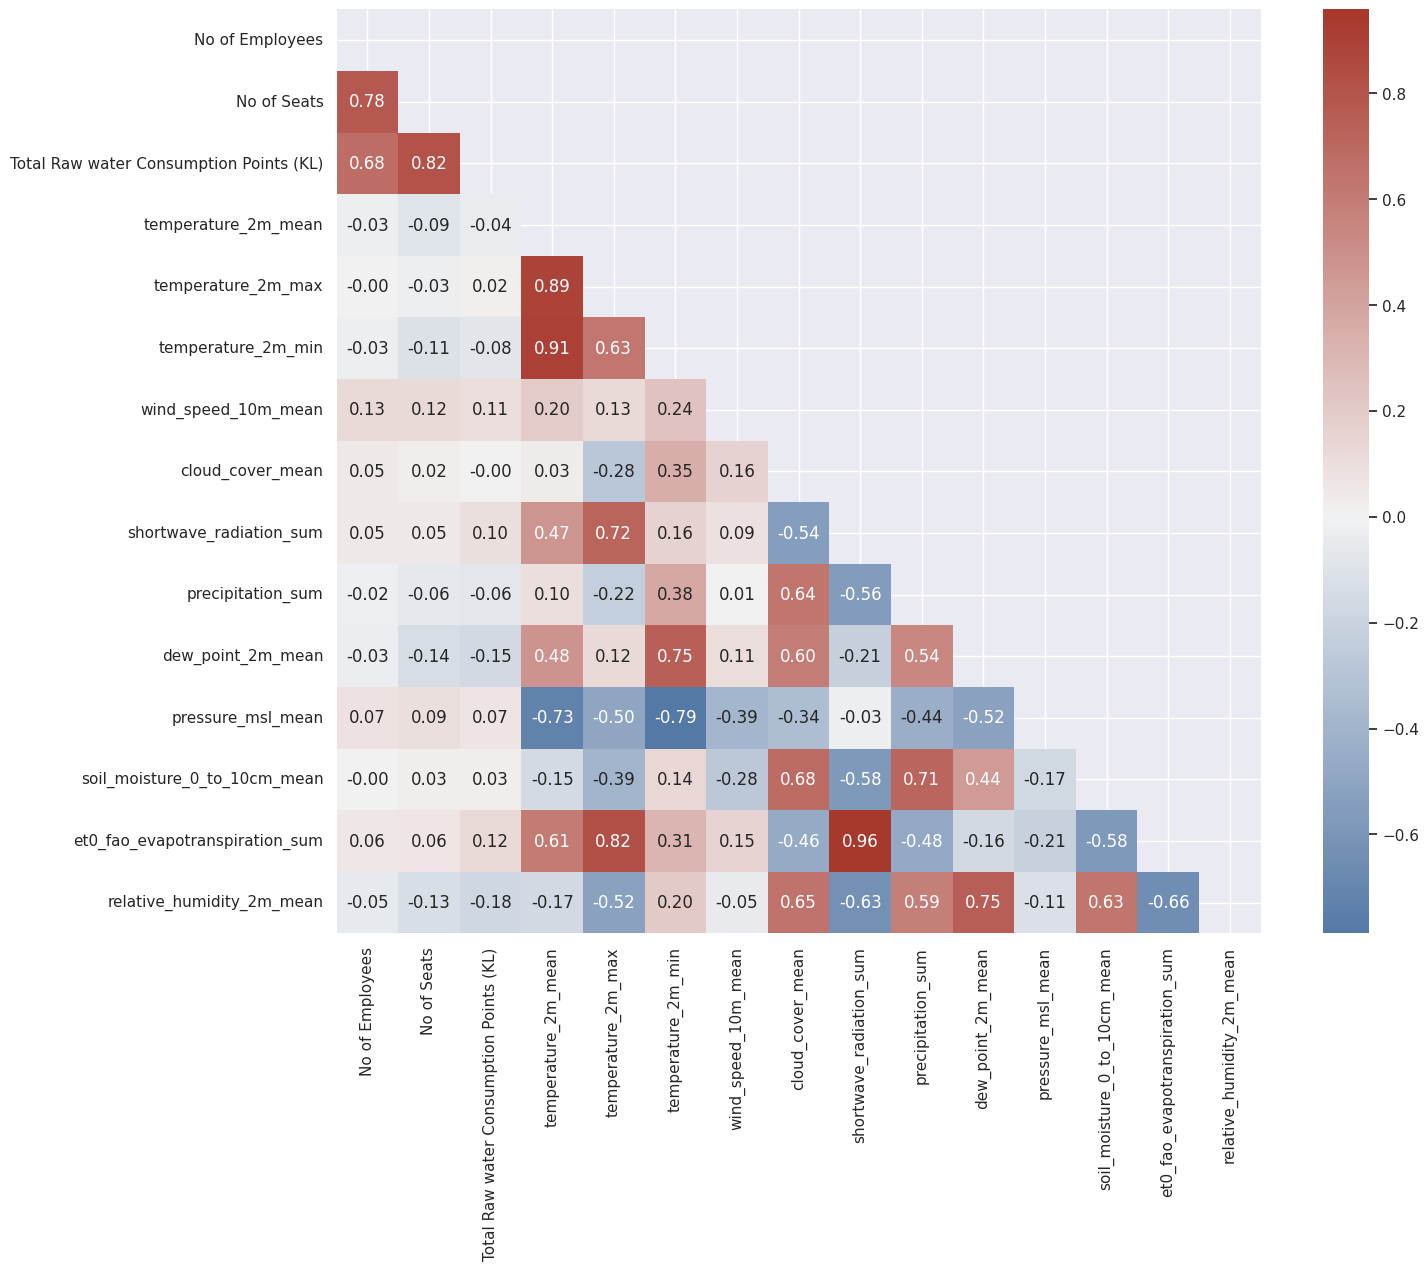

In [17]:
#look at a scatter plot to get a sense of how each variable is correlated with the rest.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exclude non-numeric columns
numeric_data = new_data.select_dtypes(include=['float64', 'int64'])

# Calculate pairwise correlations for numeric columns
matrix = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

# Show the plot
plt.show()

#Data Standardization

In [18]:
# Top 10 cites by the Total Units (kWh)
top_10_cities = new_data.groupby('City')['Total Raw water Consumption Points (KL)'].sum().sort_values(ascending=False).reset_index()

pd.set_option('display.float_format', '{:,.0f}'.format)

top_10_cities.head(10)

,City,Total Raw water Consumption Points (KL)
0,bangalore city,"1,925,558"
1,hyderabad city,"1,625,229"
2,pune,"1,433,586"
3,chennai city,"1,368,215"
4,noida city,"463,775"
5,kolkata city,"463,432"
6,cochin (kochi) city,"373,623"
7,mumbai city,"244,701"
8,delhi city,"118,377"
9,vizag city,"73,027"


In [19]:
#top 10 cities name
top_10_cities=pd.DataFrame(new_data.groupby('City')['Total Raw water Consumption Points (KL)'].sum()).sort_values(by='Total Raw water Consumption Points (KL)',ascending=False).reset_index()

top_10_cities_names=top_10_cities.City[:11]
top_10_cities_names

,City
0,bangalore city
1,hyderabad city
2,pune
3,chennai city
4,noida city
5,kolkata city
6,cochin (kochi) city
7,mumbai city
8,delhi city
9,vizag city


#Data Standardization

In [20]:
# normalized the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the data, excluding 'Date', 'City',
scaled = scaler.fit_transform(new_data.drop(columns=['Total Raw water Consumption Points (KL)','Date','City']))

# create datefrane for scaled data
scaled_df=pd.DataFrame(data=scaled,columns=new_data.drop(columns=['Total Raw water Consumption Points (KL)','Date','City']).columns)

# Display scaled data with more precision (decimal points)
pd.options.display.float_format = '{:.4f}'.format
scaled_df.head()

,No of Employees,No of Seats,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,0.7616,0.5721,0.6299,0.5947,0.6487,0.1809,0.8128,0.9075,0.1405,0.5650,0.6919,0.5474,0.8309,0.4503
1,0.5601,0.7130,0.4739,0.4014,0.6093,0.3869,0.7074,0.8921,0.4784,0.7818,0.6611,0.7258,0.7444,0.8090
2,0.5601,0.7130,0.2669,0.0476,0.5577,0.8312,0.9636,0.3883,0.5682,0.7735,0.5510,0.9998,0.3076,0.9484
3,0.5601,0.7130,0.2402,0.0743,0.5236,0.7794,0.9986,0.2788,0.1861,0.7381,0.5749,0.8250,0.2670,0.9047
4,0.5601,0.7130,0.2964,0.1722,0.5502,0.3997,0.9802,0.5906,0.4598,0.7854,0.6458,0.9322,0.5190,0.9219


In [21]:
new_df=new_data.copy()
new_df[scaled_df.columns]=np.array(scaled_df)
new_df['City_copy']=list(new_df.City)

In [22]:
new_df=new_df.set_index(['City','Date']) #Set Multi-level Index
new_df.head()

No of Employees  No of Seats  \
City           Date                                       
bangalore city 2016-04-01           0.7616       0.5721   
               2016-05-01           0.5601       0.7130   
               2016-06-01           0.5601       0.7130   
               2016-07-01           0.5601       0.7130   
               2016-08-01           0.5601       0.7130   

                           Total Raw water Consumption Points (KL)  \
City           Date                                                  
bangalore city 2016-04-01                               23188.8450   
               2016-05-01                               23188.8450   
               2016-06-01                               23188.8450   
               2016-07-01                               23188.8450   
               2016-08-01                               23188.8450   

                           temperature_2m_mean  temperature_2m_max  \
City           Date                                                  
bangalore city 2016-04-01               0.6299              0.5947   
               2016-05-01               0.4739              0.4014   
               2016-06-01               0.2669              0.0476   
               2016-07-01               0.2402              0.0743   
               2016-08-01               0.2964              0.1722   

                           temperature_2m_min  wind_speed_10m_mean  \
City           Date                                                  
bangalore city 2016-04-01              0.6487               0.1809   
               2016-05-01              0.6093               0.3869   
               2016-06-01              0.5577               0.8312   
               2016-07-01              0.5236               0.7794   
               2016-08-01              0.5502               0.3997   

                           cloud_cover_mean  shortwave_radiation_sum  \
City           Date                                                    
bangalore city 2016-04-01            0.8128                   0.9075   
               2016-05-01            0.7074                   0.8921   
               2016-06-01            0.9636                   0.3883   
               2016-07-01            0.9986                   0.2788   
               2016-08-01            0.9802                   0.5906   

                           precipitation_sum  dew_point_2m_mean  \
City           Date                                               
bangalore city 2016-04-01             0.1405             0.5650   
               2016-05-01             0.4784             0.7818   
               2016-06-01             0.5682             0.7735   
               2016-07-01             0.1861             0.7381   
               2016-08-01             0.4598             0.7854   

                           pressure_msl_mean  soil_moisture_0_to_10cm_mean  \
City           Date                                                          
bangalore city 2016-04-01             0.6919                        0.5474   
               2016-05-01             0.6611                        0.7258   
               2016-06-01             0.5510                        0.9998   
               2016-07-01             0.5749                        0.8250   
               2016-08-01             0.6458                        0.9322   

                           et0_fao_evapotranspiration_sum  \
City           Date                                         
bangalore city 2016-04-01                          0.8309   
               2016-05-01                          0.7444   
               2016-06-01                          0.3076   
               2016-07-01                          0.2670   
               2016-08-01                          0.5190   

                           relative_humidity_2m_mean       City_copy  
City           Date                                                   
bangalore city 2016-04-01                     0.

#Train Test Split

In [23]:
# Because this is panel data so I will split each City's data
def train_test_split(data):
    size=int(len(data)*0.8)
    #for train data will be collected from each city's data which index is from 0-size (80%) #Sequential Splitting
    x_train =data.drop(columns=['Total Raw water Consumption Points (KL)']).iloc[0:size]

    # for test data will be collected from each city's  data which index is from size to the end (20%) #Sequential Splitting
    x_test = data.drop(columns=['Total Raw water Consumption Points (KL)']).iloc[size:]
    y_train=data['Total Raw water Consumption Points (KL)'].iloc[0:size]
    y_test=data['Total Raw water Consumption Points (KL)'].iloc[size:]
    return x_train, x_test,y_train,y_test


In [24]:
City_copy=list(set(new_df.City_copy))
# loop each city and split the data into train and test data
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
for i in range(0,len(City_copy)):
    data=new_df[new_df['City_copy']==City_copy[i]]
    # applied the function I created above
    x_train, x_test,y_train,y_test=train_test_split(data)
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

In [25]:
X_train[1].head()

No of Employees  No of Seats  temperature_2m_mean  \
City         Date                                                            
kolkata city 2016-04-01           0.8162       0.5501               0.7029   
             2016-05-01           0.6318       0.5334               0.6712   
             2016-06-01           0.2938       0.2242               0.6983   
             2016-07-01           0.8899       0.7762               0.6913   
             2016-08-01           0.2004       0.1575               0.7085   

                         temperature_2m_max  temperature_2m_min  \
City         Date                                                 
kolkata city 2016-04-01              0.5998              0.8052   
             2016-05-01              0.4126              0.8842   
             2016-06-01              0.4283              0.9204   
             2016-07-01              0.4339              0.9136   
             2016-08-01              0.5035              0.9076   

                         wind_speed_10m_mean  cloud_cover_mean  \
City         Date                                                
kolkata city 2016-04-01               0.5425            0.4369   
             2016-05-01               0.3418            0.6893   
             2016-06-01               0.4777            0.8631   
             2016-07-01               0.5035            0.9012   
             2016-08-01               0.4799            0.9478   

                         shortwave_radiation_sum  precipitation_sum  \
City         Date                                                     
kolkata city 2016-04-01                   0.8546             0.2704   
             2016-05-01                   0.7009             0.9769   
             2016-06-01                   0.3580             0.8350   
             2016-07-01                   0.2668             0.5928   
             2016-08-01                   0.5049             0.6412   

                         dew_point_2m_mean  pressure_msl_mean  \
City         Date                                               
kolkata city 2016-04-01             0.9423             0.4625   
             2016-05-01             1.0000             0.3694   
             2016-06-01             1.0000             0.0452   
             2016-07-01             0.9944             0.1717   
             2016-08-01             1.0000             0.2995   

                         soil_moisture_0_to_10cm_mean  \
City         Date                                       
kolkata city 2016-04-01                        0.5081   
             2016-05-01                        0.7277   
             2016-06-01                        0.8900   
             2016-07-01                        0.8726   
             2016-08-01                        0.8479   

                         et0_fao_evapotranspiration_sum  \
City         Date                                         
kolkata city 2016-04-01                          0.7212   
             2016-05-01                          0.6401   
             2016-06-01                          0.3971   
             2016-07-01                          0.2791   
             2016-08-01                          0.4123   

                         relative_humidity_2m_mean     City_copy  
City         Date                                                 
kolkata city 2016-04-01                     0.8699  kolkata city  
             2016-05-01                     1.0000  kolkata city  
             2016-06-01                     0.9820  kolkata city  
             2016-07-01                     0.9576  kolkata city  
             2016-08-01                     0.9417  kolkata city

In [26]:
Y_train[1].head()

City          Date      
kolkata city  2016-04-01   6723.0000
              2016-05-01   7321.0000
              2016-06-01   6494.0000
              2016-07-01   5906.0000
              2016-08-01   4369.0000
Name: Total Raw water Consumption Points (KL), dtype: float64

In [27]:
# concatenate each train dataset in X_train list and Y_train list respectively
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))

# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [28]:
# double check the train data and test data and our target
X_train.head()

No of Employees  No of Seats  temperature_2m_mean  \
City        Date                                                            
mysore city 2016-04-01           0.0008       0.0472               0.5915   
            2016-05-01           0.1377       0.1002               0.4818   
            2016-06-01           0.1512       0.1319               0.3391   
            2016-07-01           0.0330       0.0417               0.2984   
            2016-08-01           0.0346       0.0428               0.3660   

                        temperature_2m_max  temperature_2m_min  \
City        Date                                                 
mysore city 2016-04-01              0.5818              0.6799   
            2016-05-01              0.3941              0.6558   
            2016-06-01              0.1227              0.6303   
            2016-07-01              0.1119              0.5953   
            2016-08-01              0.2767              0.6039   

                        wind_speed_10m_mean  cloud_cover_mean  \
City        Date                                                
mysore city 2016-04-01               0.2138            0.8791   
            2016-05-01               0.5017            0.8032   
            2016-06-01               0.8435            0.9747   
            2016-07-01               0.8022            1.0000   
            2016-08-01               0.4604            0.9749   

                        shortwave_radiation_sum  precipitation_sum  \
City        Date                                                     
mysore city 2016-04-01                   0.8839             0.1972   
            2016-05-01                   0.8665             0.4262   
            2016-06-01                   0.3496             0.4898   
            2016-07-01                   0.2546             0.2226   
            2016-08-01                   0.7316             0.5850   

                        dew_point_2m_mean  pressure_msl_mean  \
City        Date                                               
mysore city 2016-04-01             0.8039             0.6864   
            2016-05-01             0.8545             0.6648   
            2016-06-01             0.8093             0.5595   
            2016-07-01             0.7757             0.5816   
            2016-08-01             0.8265             0.6304   

                        soil_moisture_0_to_10cm_mean  \
City        Date                                       
mysore city 2016-04-01                        0.3222   
            2016-05-01                        0.4837   
            2016-06-01                        0.7537   
            2016-07-01                        0.6283   
            2016-08-01                        0.7934   

                        et0_fao_evapotranspiration_sum  \
City        Date                                         
mysore city 2016-04-01                          0.7946   
            2016-05-01                          0.7086   
            2016-06-01                          0.3056   
            2016-07-01                          0.2630   
            2016-08-01                          0.6218   

                        relative_humidity_2m_mean    City_copy  
City        Date                                                
mysore city 2016-04-01                     0.7254  mysore city  
            2016-05-01                     0.8875  mysore city  
            2016-06-01                     0.9370  mysore city  
            2016-07-01                     0.9093  mysore city  
            2016-08-01                     0.9158  mysore city

In [29]:
X_train.shape

(1045, 15)

#Data Preprocessing

In [30]:
# Code Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create the reshape function
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)

    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values

    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

In [31]:
encoder = LabelEncoder()
#combine X train and Y train as train data
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train
train_data['City_copy']= encoder.fit_transform(train_data['City_copy'])


#combine X test and Y test as test data
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test
test_data['City_copy']= encoder.fit_transform(test_data['City_copy'])

In [32]:
train_data

No of Employees  No of Seats  temperature_2m_mean  \
City         Date                                                            
mysore city  2016-04-01           0.0008       0.0472               0.5915   
             2016-05-01           0.1377       0.1002               0.4818   
             2016-06-01           0.1512       0.1319               0.3391   
             2016-07-01           0.0330       0.0417               0.2984   
             2016-08-01           0.0346       0.0428               0.3660   
...                                  ...          ...                  ...   
chennai city 2022-07-01           1.0000       0.7762               0.9816   
             2022-08-01           0.9751       0.7799               0.7470   
             2022-09-01           0.9589       0.9630               0.7257   
             2022-10-01           0.9436       0.9550               0.6443   
             2022-11-01           0.9479       0.8246               0.5401   

                         temperature_2m_max  temperature_2m_min  \
City         Date                                                 
mysore city  2016-04-01              0.5818              0.6799   
             2016-05-01              0.3941              0.6558   
             2016-06-01              0.1227              0.6303   
             2016-07-01              0.1119              0.5953   
             2016-08-01              0.2767              0.6039   
...                                     ...                 ...   
chennai city 2022-07-01              0.9349              1.0000   
             2022-08-01              0.5527              0.9292   
             2022-09-01              0.5431              0.9044   
             2022-10-01              0.4036              0.8572   
             2022-11-01              0.2751              0.7782   

                         wind_speed_10m_mean  cloud_cover_mean  \
City         Date                                                
mysore city  2016-04-01               0.2138            0.8791   
             2016-05-01               0.5017            0.8032   
             2016-06-01               0.8435            0.9747   
             2016-07-01               0.8022            1.0000   
             2016-08-01               0.4604            0.9749   
...                                      ...               ...   
chennai city 2022-07-01               1.0000            0.7873   
             2022-08-01               0.5192            0.8378   
             2022-09-01               0.7370            0.8193   
             2022-10-01               0.5296            0.7684   
             2022-11-01               0.8210            0.8925   

                         shortwave_radiation_sum  precipitation_sum  \
City         Date                                                     
mysore city  2016-04-01                   0.8839             0.1972   
             2016-05-01                   0.8665             0.4262   
             2016-06-01                   0.3496             0.4898   
             2016-07-01                   0.2546             0.2226   
             2016-08-01                   0.7316             0.5850   
...                                          ...                ...   
chennai city 2022-07-01                   0.5460             0.0633   
             2022-08-01                   0.4328             0.3683   
             2022-09-01                   0.5520             0.3585   
             2022-10-01                   0.5069             0.5959   
             2022-11-01                   0.0702             0.8618   

                         dew_point_2m_mean  pressure_msl_mean  \
City         Date                                               
mysore city  2016-04-01             0.8039             0.6864   
             2016-05-01             0.8545             0.6648   
             2016-06-01             0.8093             0.5595   
             2016-07-01       

In [33]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

# Try Single LSTM model for all cities

In [34]:
# design network
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3453.6611
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3212.5854
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2883.0466
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2596.9578
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2262.3010
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1701.4374
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 991.1883
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 738.0822
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 761.9827
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 756.8076
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 745.7286
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753.6228
Epoch 13/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 746.8546
Epoch 14/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 752.9407
Epoch 15/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

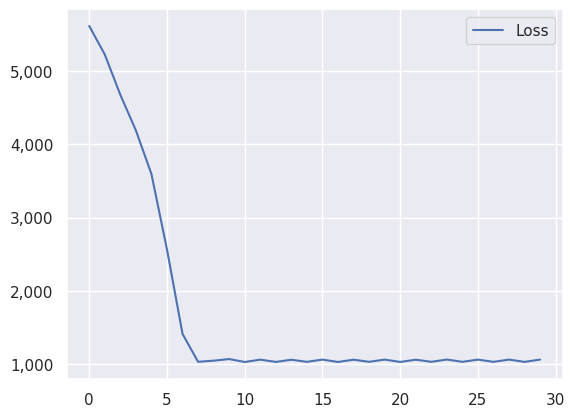

In [35]:
# plot history
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Plot history
plt.plot(history.history['loss'], label='Loss')

# Use ScalarFormatter to display the actual value instead of scientific notation
plt.gca().get_yaxis().set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add legend and show plot
plt.legend()
plt.show()


#Make prediction

In [36]:
# make a prediction
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


((271, 1), (271,))

#Model Evaluation

In [ ]:
#pa=pd.DataFrame()
#pa['Date']=X_test.reset_index().Date.iloc[1:-1]
#pa['Prediction']=[i[0] for i in y_test_pre][1:]
#pa['Actual Values']=y_test[:-1]
#pa.head(20)

,Date,Prediction,Actual Values
1,2023-01-01,2238920.7500,2283718.0000
2,2023-02-01,2139213.2500,2182000.0000
3,2023-03-01,2516274.0000,2566659.0000
4,2023-04-01,2794589.7500,2850582.6000
5,2023-05-01,3098251.5000,3160365.0000
6,2023-06-01,3006082.2500,3066339.0000
7,2023-07-01,2813058.7500,2869425.6000
8,2023-08-01,2890843.5000,2948778.0000
9,2023-09-01,2586395.5000,2638195.0000
10,2023-10-01,2213051.5000,2257326.8000


In [37]:
pa = pd.DataFrame()

# Reset index for X_test to access Date and City_copy
X_test_reset = X_test.reset_index()

# Add 'Date' and 'City_copy' columns from X_test
pa['Date'] = X_test_reset['Date'].iloc[1:-1]
pa['City_copy'] = X_test_reset['City_copy'].iloc[1:-1]  # Add City_copy

# Add predictions and actual values
pa['Prediction'] = [i[0] for i in y_test_pre][1:]
pa['Actual Values'] = y_test[:-1]

# Display the result
pa.head(60)



,Date,City_copy,Prediction,Actual Values
1,2023-02-01,mysore city,245.1364,232.7000
2,2023-03-01,mysore city,292.9338,277.1000
3,2023-04-01,mysore city,275.1793,260.1000
4,2023-05-01,mysore city,284.4911,270.0000
5,2023-06-01,mysore city,318.8383,302.9000
6,2023-07-01,mysore city,330.4795,314.5000
7,2023-08-01,mysore city,324.4171,308.3000
8,2023-09-01,mysore city,249.9439,239.7000
9,2023-10-01,mysore city,224.7348,217.0000
10,2023-11-01,mysore city,265.6692,254.3000


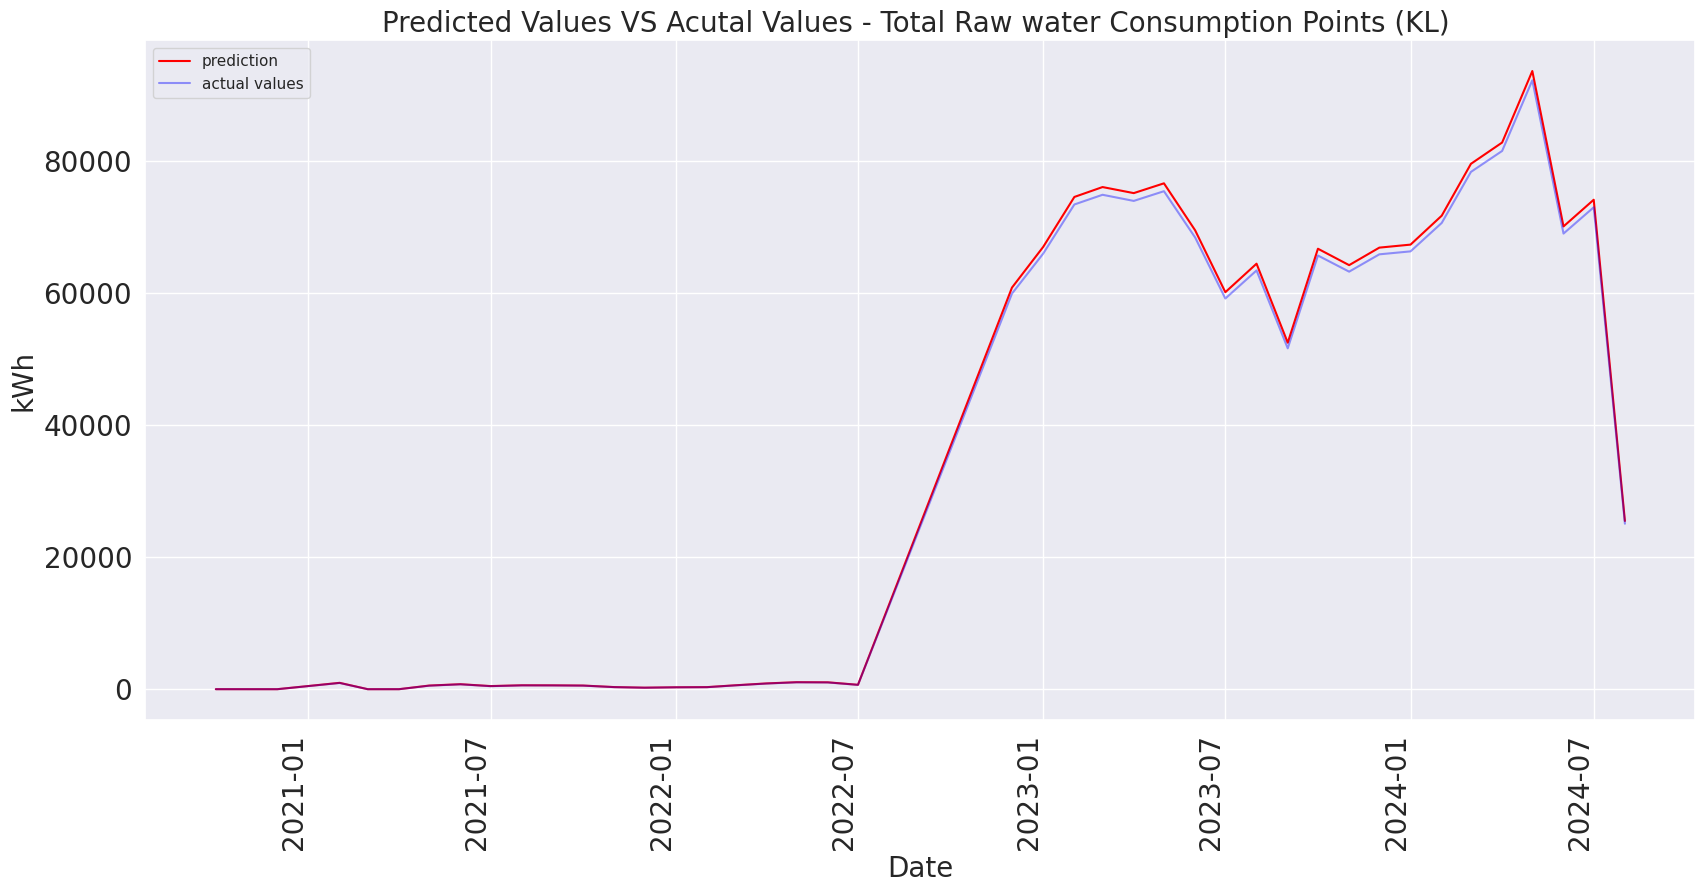

In [38]:
plt.figure(figsize=(20,10))
pa.groupby('Date')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("Date")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('kWh',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Total Raw water Consumption Points (KL) ',fontsize=20)
plt.legend()

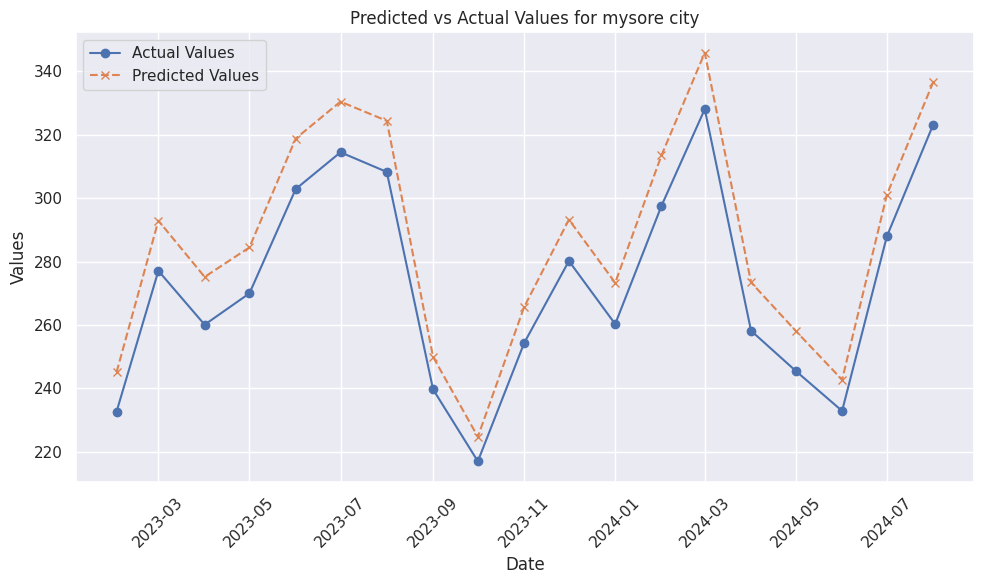

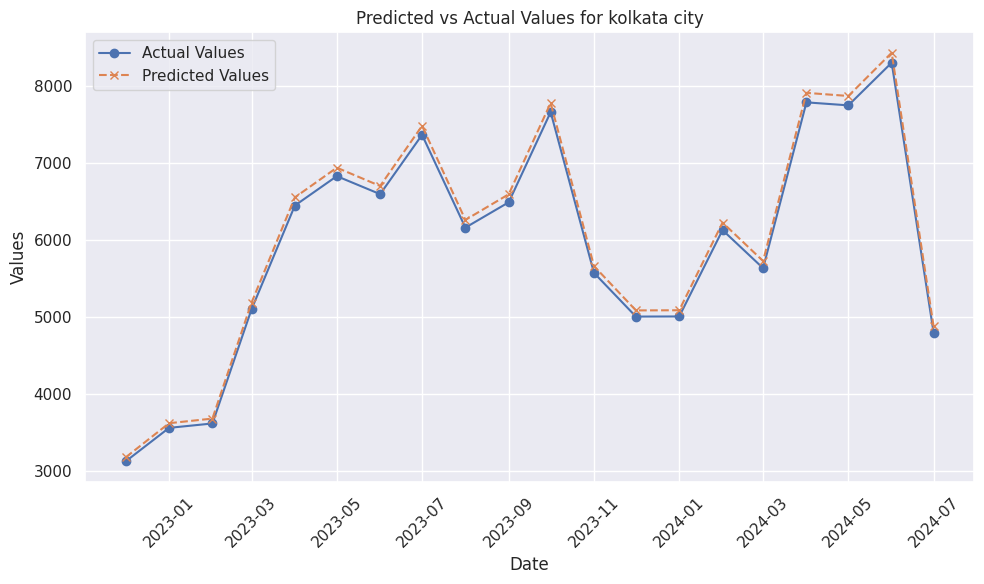

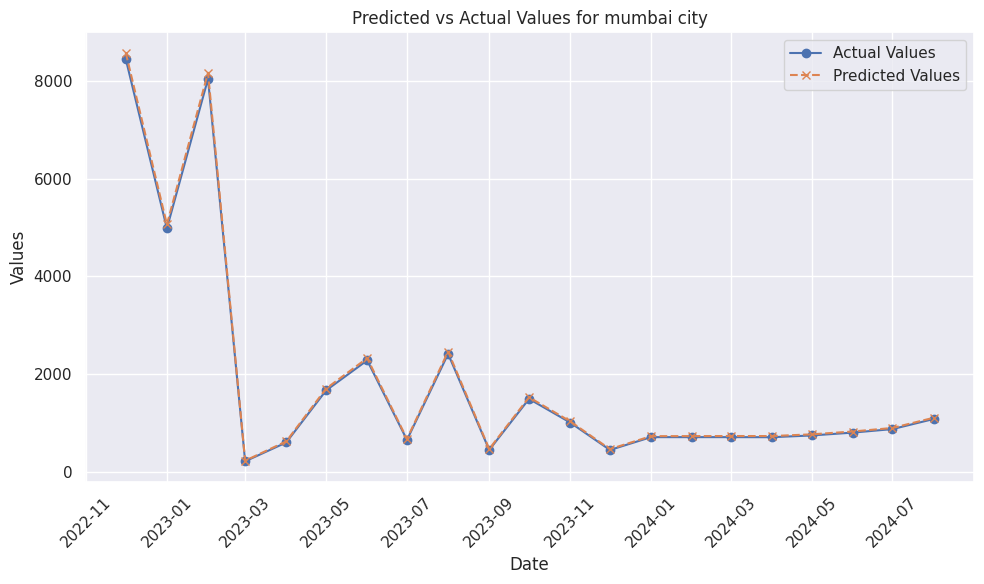

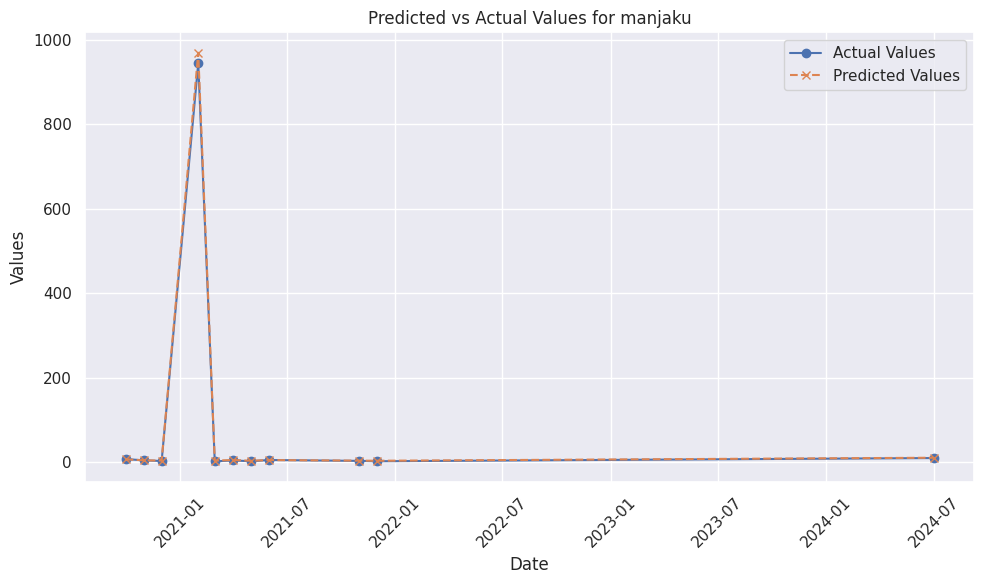

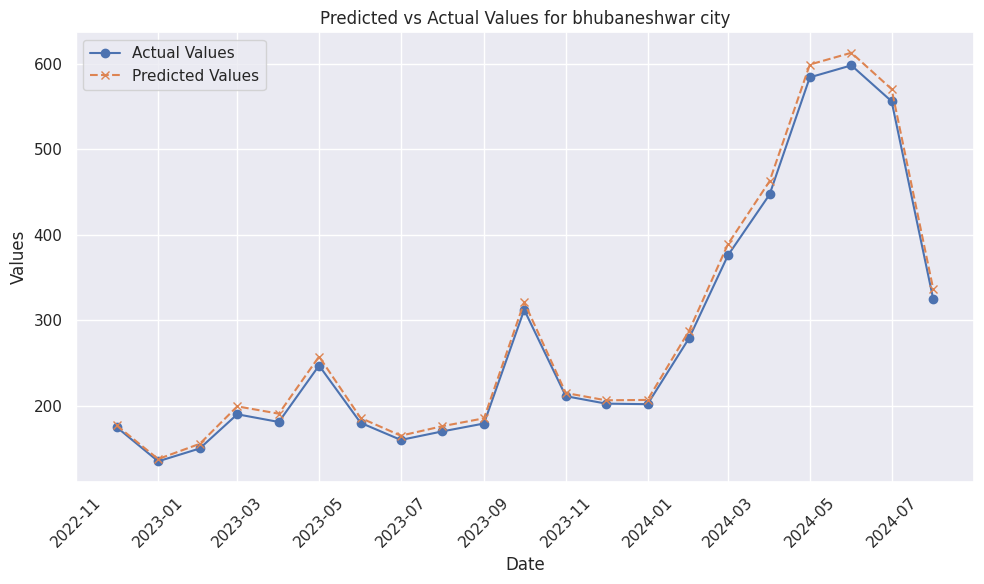

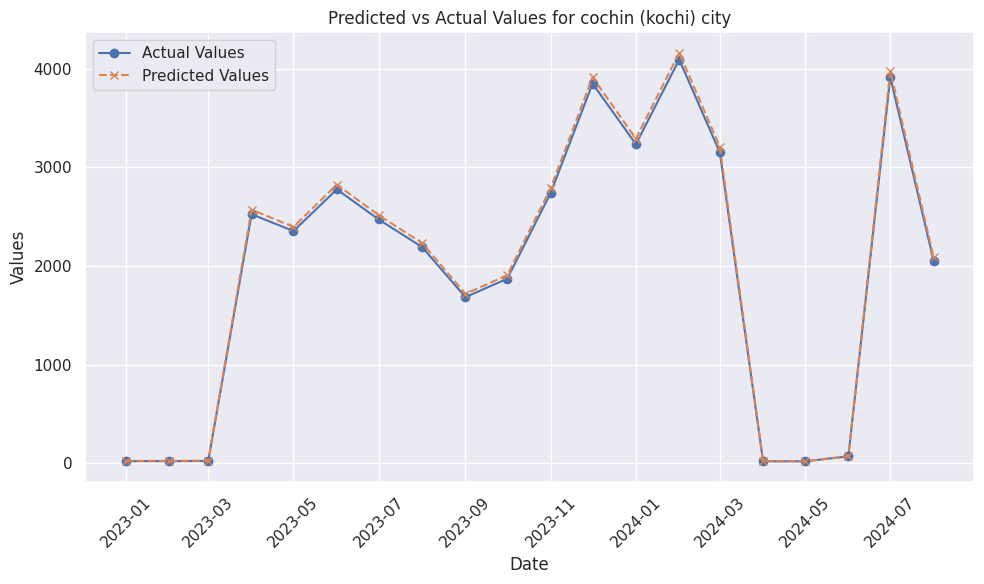

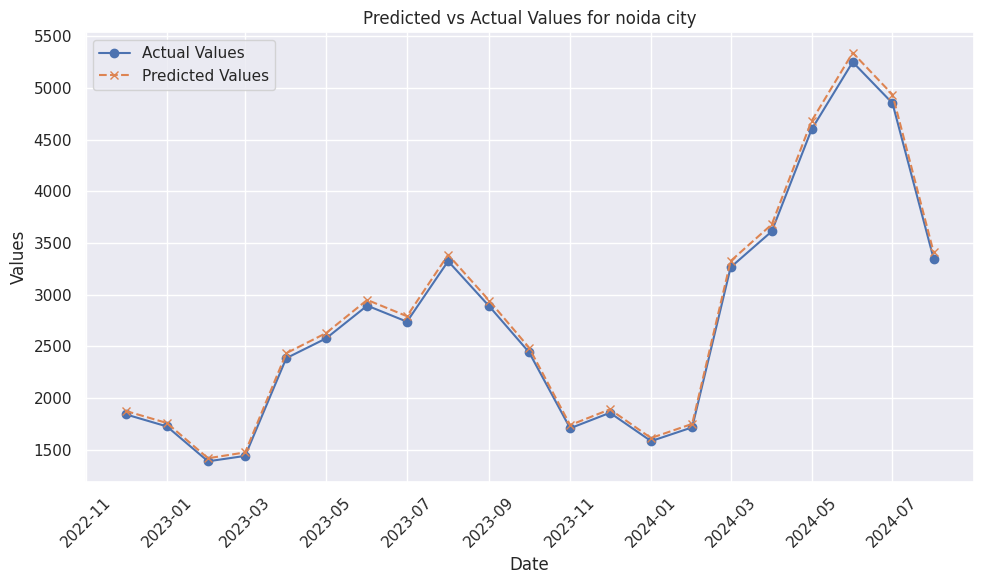

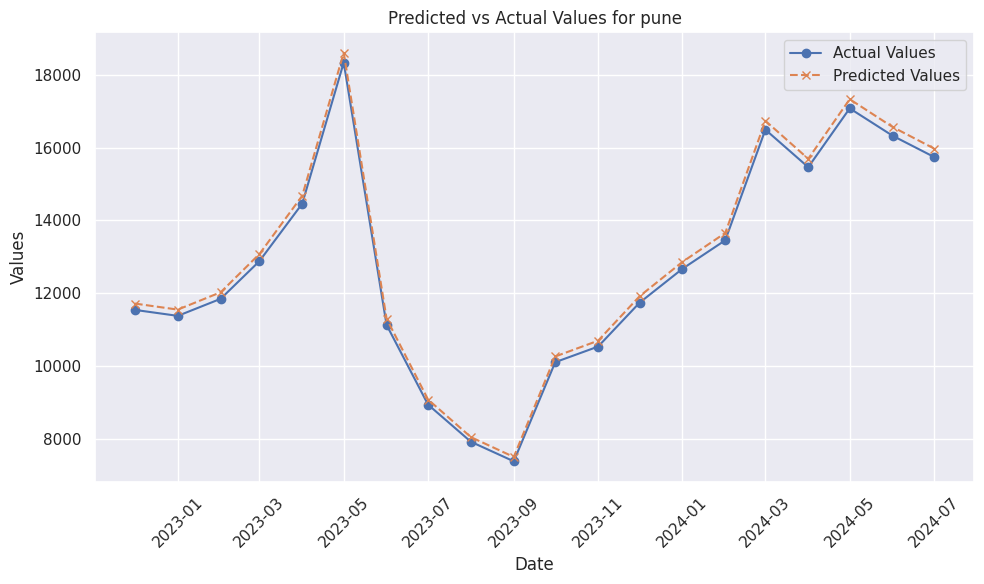

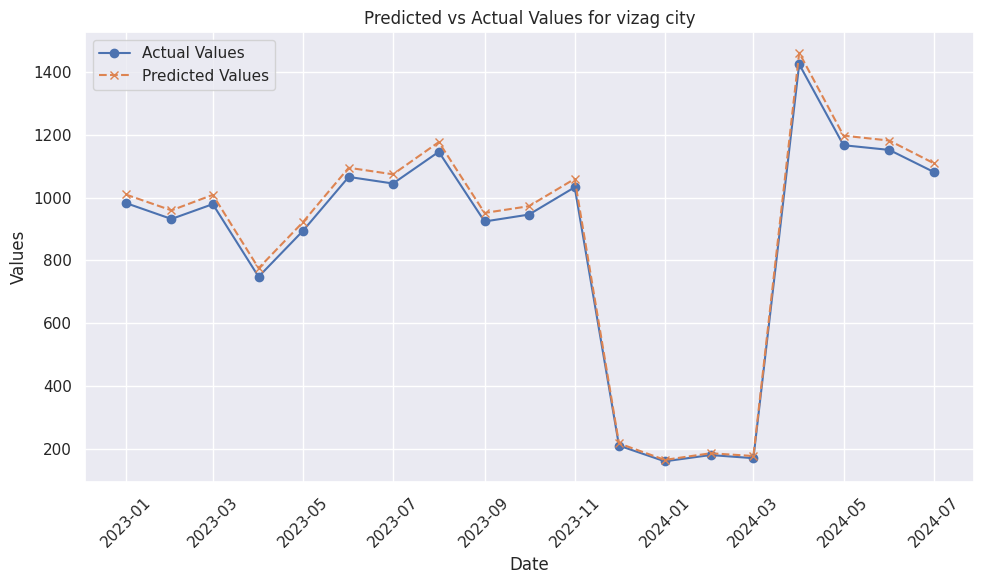

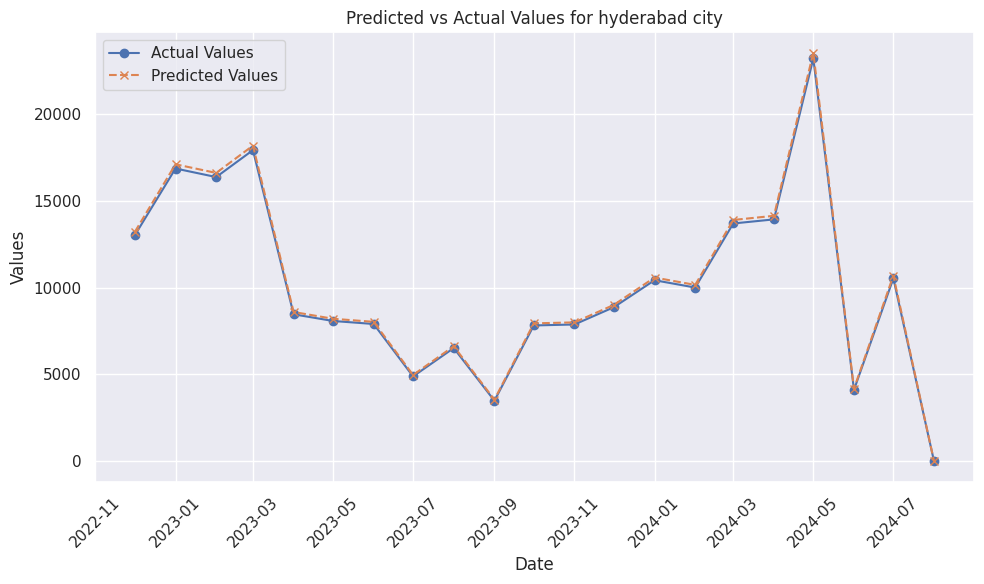

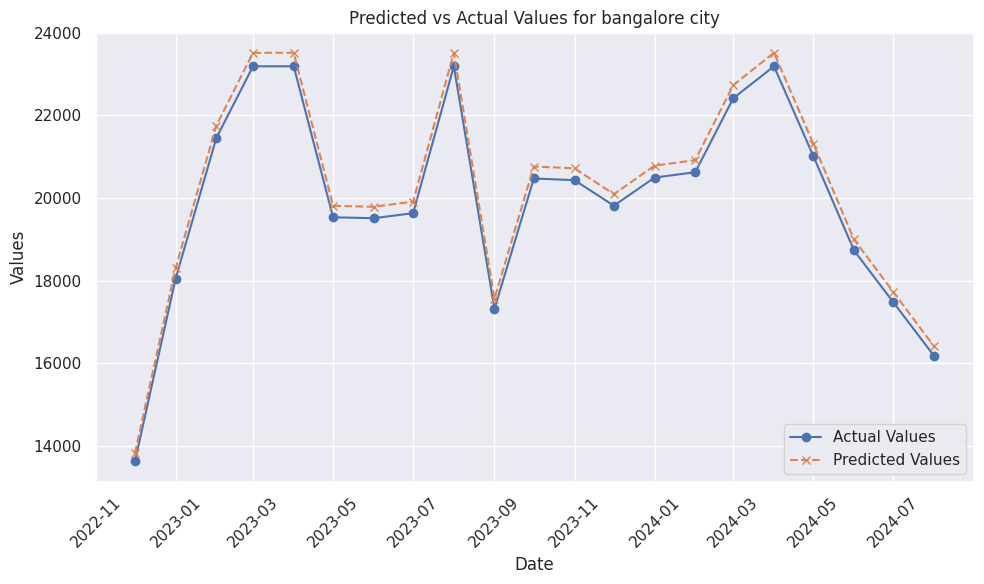

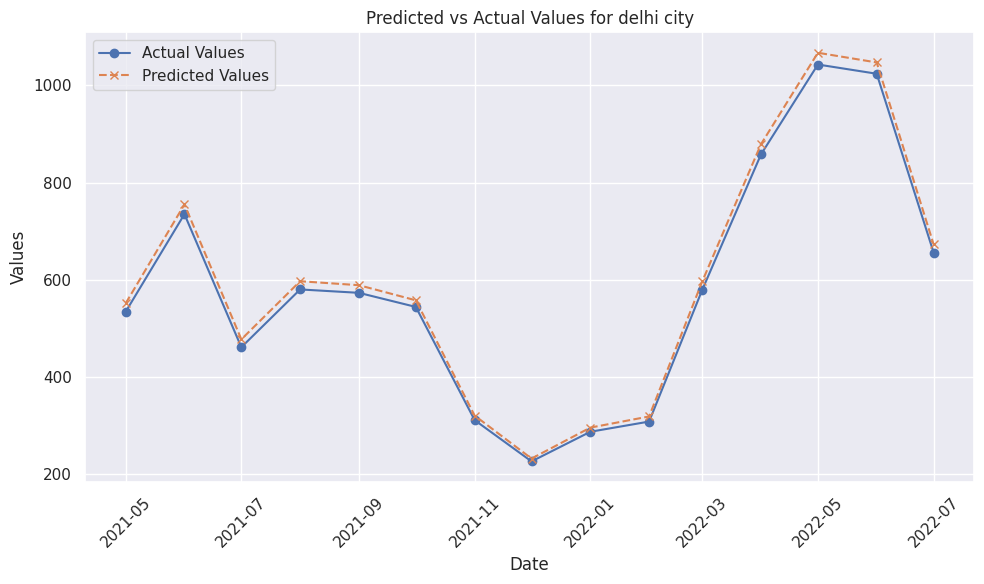

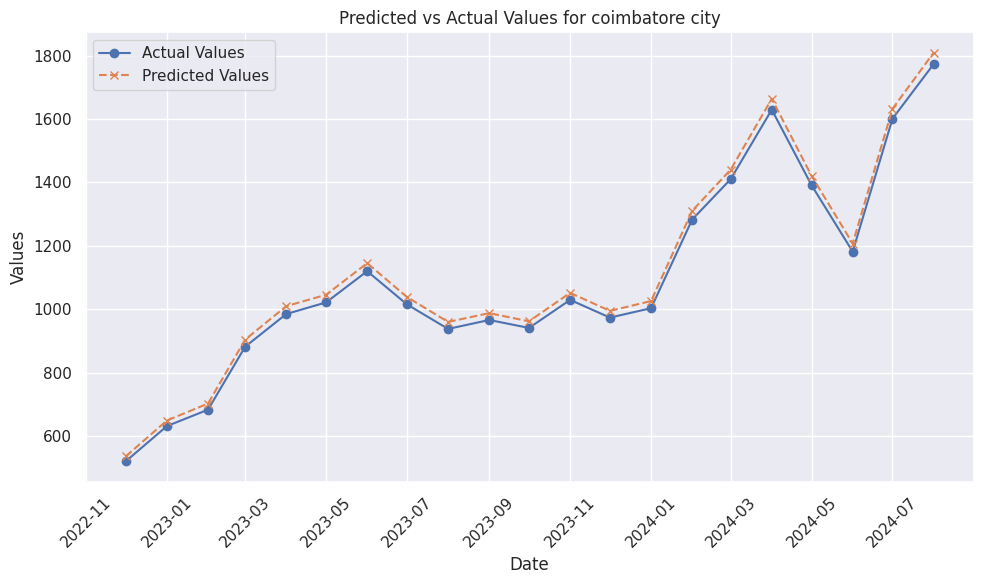

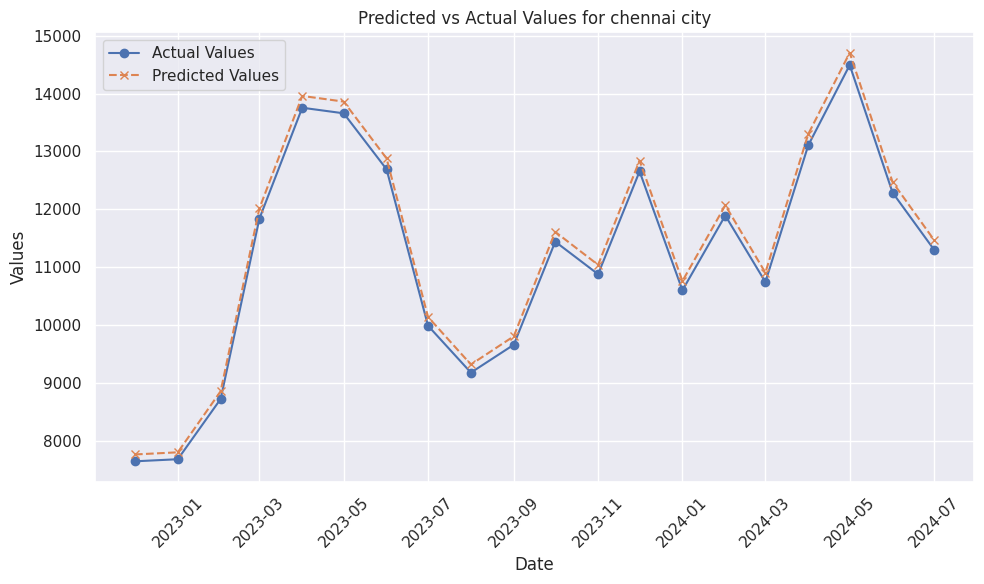

In [39]:
cities = pa['City_copy'].unique()  # Get unique cities

# Loop through each city and plot the predicted vs actual values
for city in cities:
    city_data = pa[pa['City_copy'] == city]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(city_data['Date'], city_data['Actual Values'], label='Actual Values', marker='o', linestyle='-')
    plt.plot(city_data['Date'], city_data['Prediction'], label='Predicted Values', marker='x', linestyle='--')

    # Labels and title
    plt.title(f'Predicted vs Actual Values for {city}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


In [40]:
from sklearn.metrics import mean_squared_error
def RMSE(actual,prediction):
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    return rmse

In [41]:
print(RMSE(y_test[:-1],[i[0] for i in y_test_pre][1:]))

122.29356838764282


#Try Separate LSTM model for each cities but outcome is not good due to small records for each city

In [42]:
def normalization_train_test_split(City_copy):
    # Initialize the scaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Apply the scaler to all columns except 'Total Raw water Consumption Points (KL)', 'Date', 'City']
    scaled = scaler.fit_transform(City_copy.drop(columns=['Total Raw water Consumption Points (KL)', 'Date', 'City']))

    # Create a DataFrame for the scaled data, ensuring other columns are included
    scaled_df = pd.DataFrame(data=scaled, columns=City_copy.drop(columns=['Total Raw water Consumption Points (KL)', 'Date', 'City']).columns)

    # Add the Total Raw water Consumption Points (KL)' column back to the DataFrame
    scaled_df['Total Raw water Consumption Points (KL)'] = list(City_copy['Total Raw water Consumption Points (KL)'])

    # Now split into training and testing sets using your custom function
    X_train, X_test, y_train, y_test = train_test_split(scaled_df)

    # Combine X_train and y_train into a single DataFrame
    train_data = pd.DataFrame()
    train_data[X_train.columns] = X_train
    train_data['Total Raw water Consumption Points (KL)'] = y_train

    # Combine X_test and y_test into a single DataFrame
    test_data = pd.DataFrame()
    test_data[X_test.columns] = X_test
    test_data['Total Raw water Consumption Points (KL)'] = y_test

    # Reshape data using your existing reshape function
    X_train, X_test, y_train, y_test = reshape_data(train_data, test_data)

    return X_train, X_test, y_train, y_test


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
bangalore city - RMSE: 8948.69464470013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
hyderabad city - RMSE: 7008.792559906832


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
pune - RMSE: 10621.854853824694


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
chennai city - RMSE: 5770.635292270327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
noida city - RMSE: 1458.3209747959343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
kolkata city - RMSE: 3341.298614684512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
cochin (kochi) city - RMSE: 358.63673918354436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
mumbai city - RMSE: 183.9090976008485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
delhi city - RMSE: 390.63598056339873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
vizag city - RMSE: 267.73369081490705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
coimbatore city - RMSE: 25.92521989756742


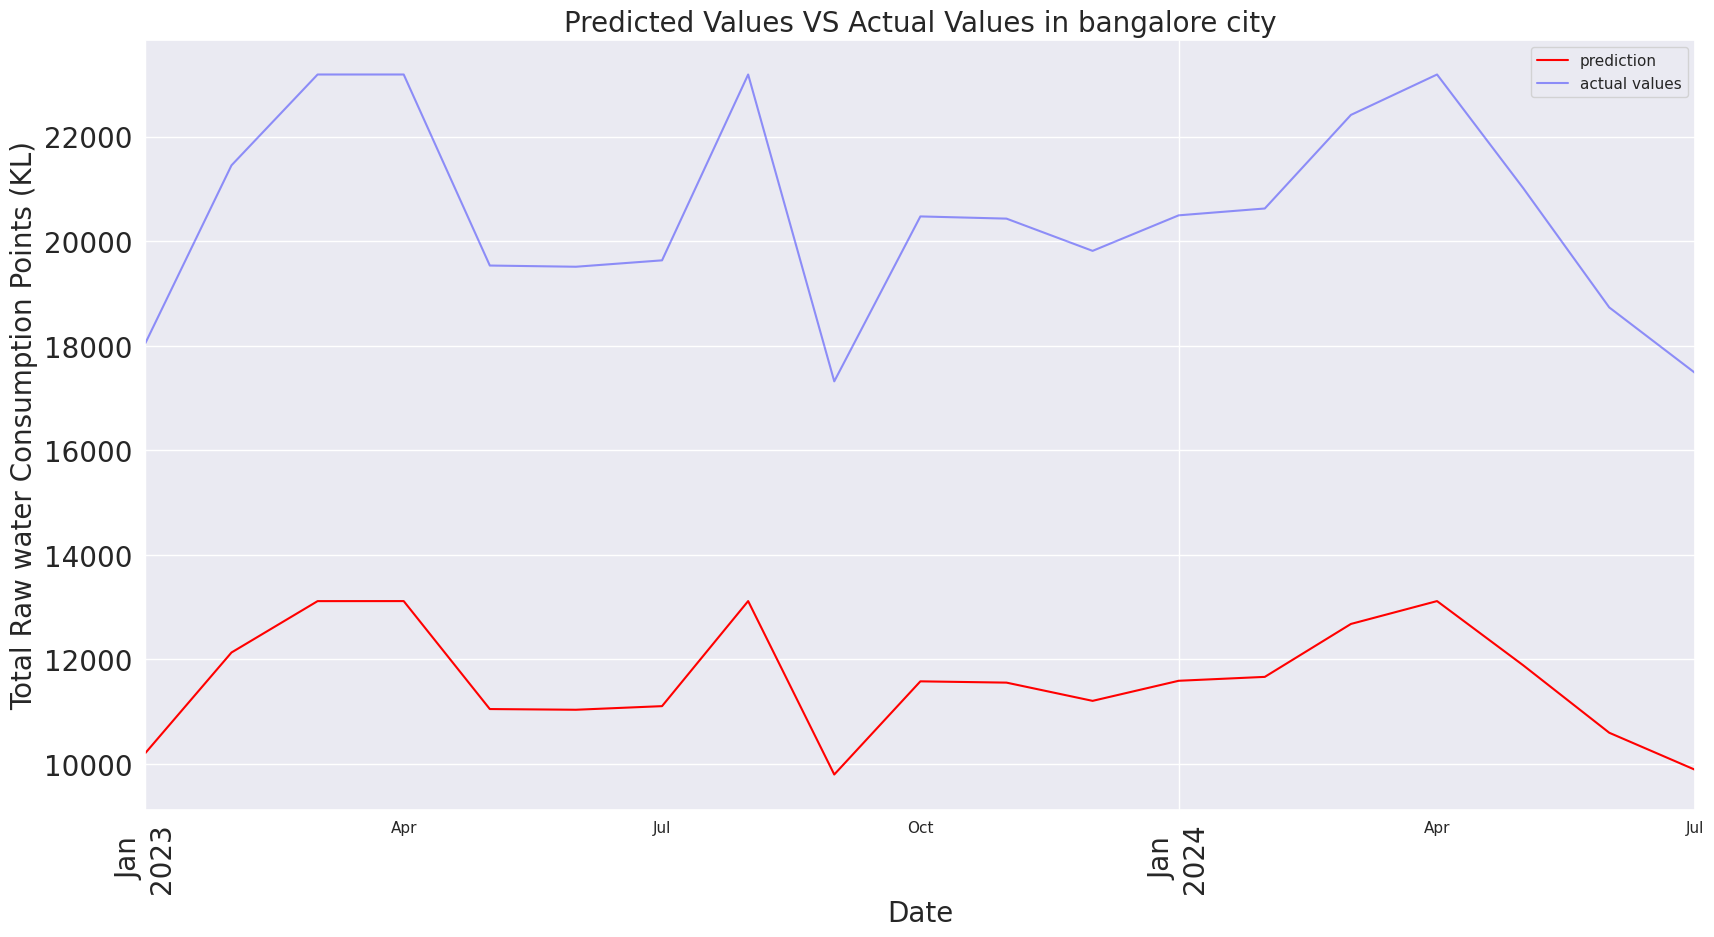

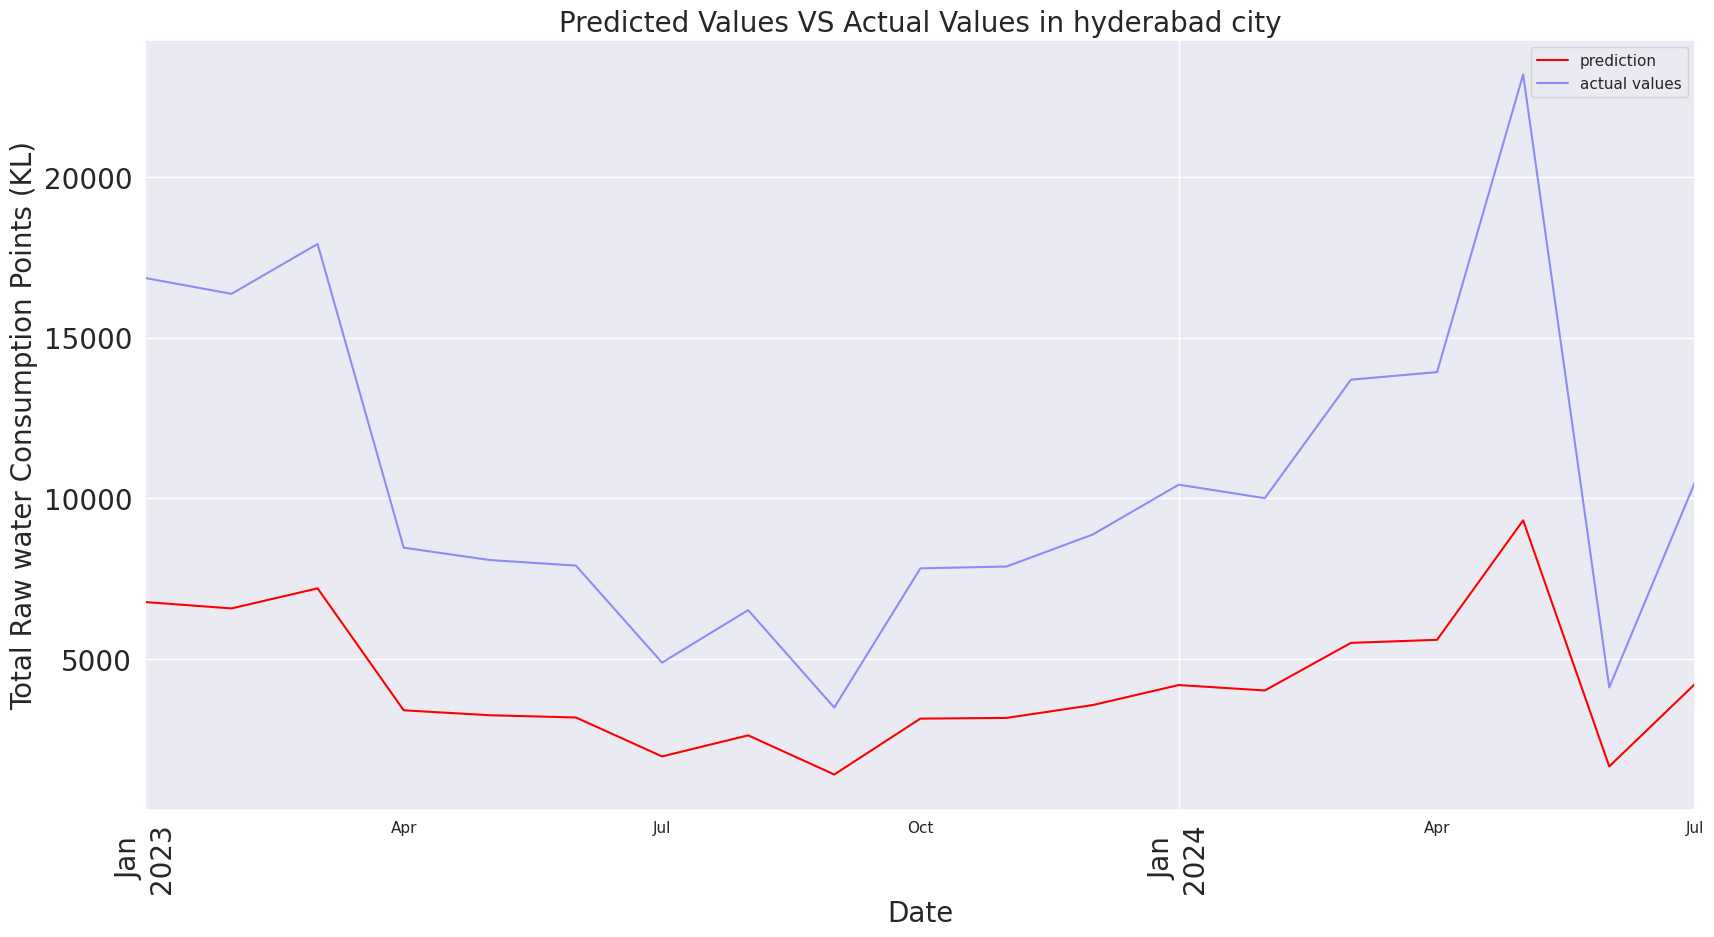

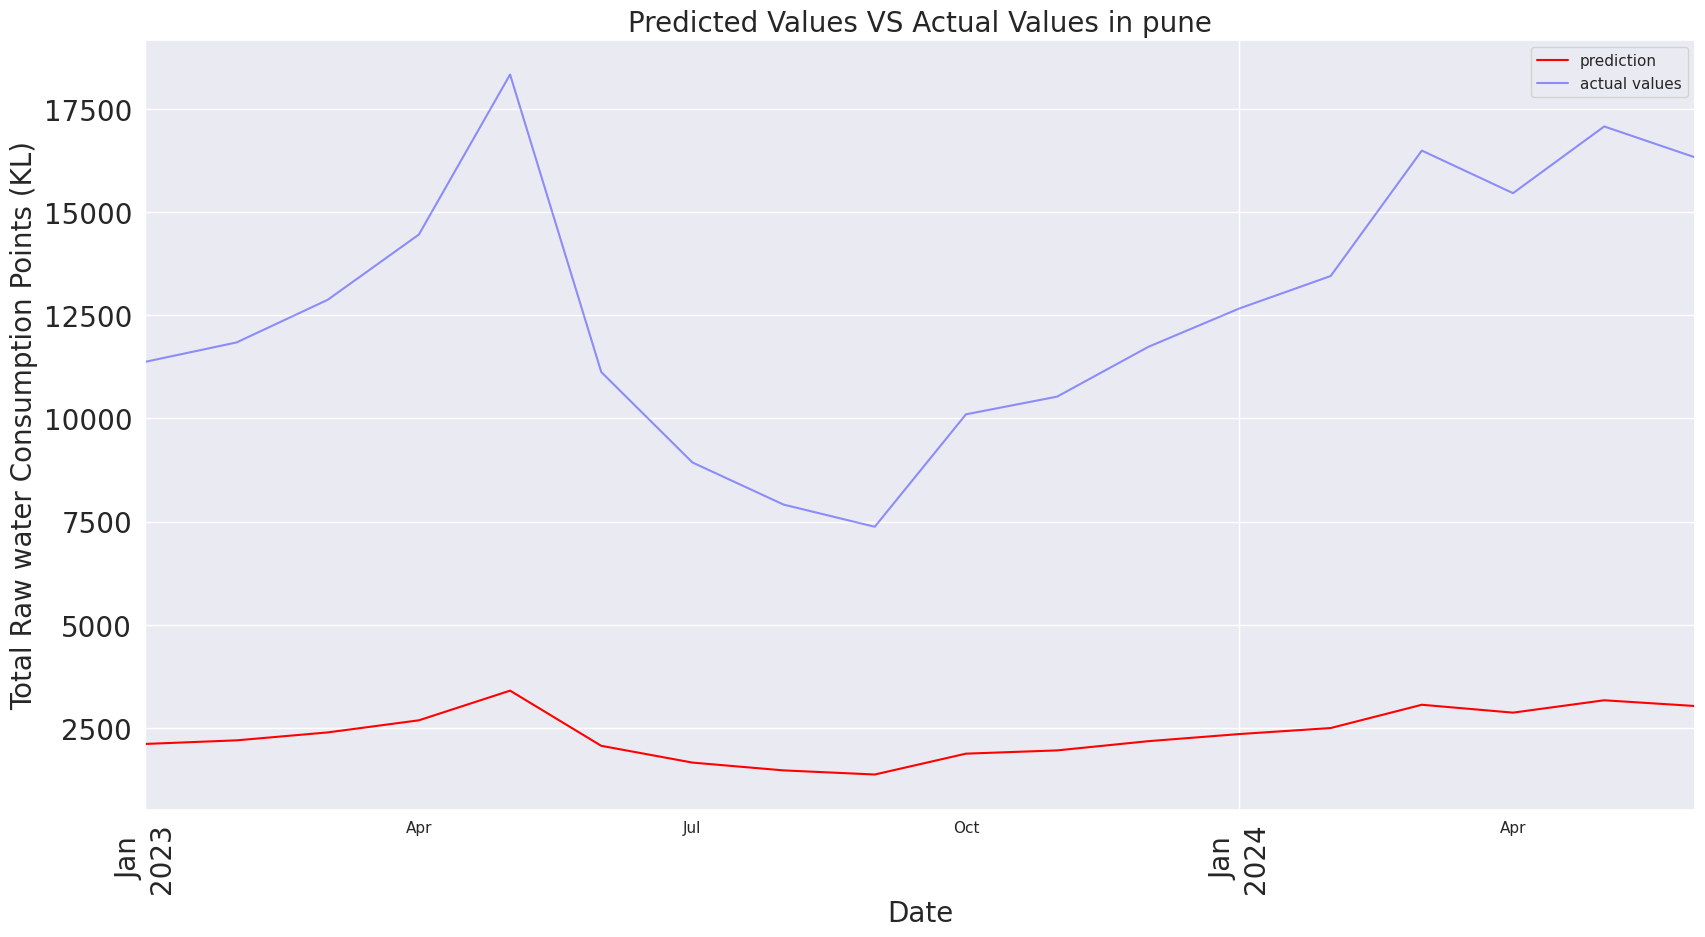

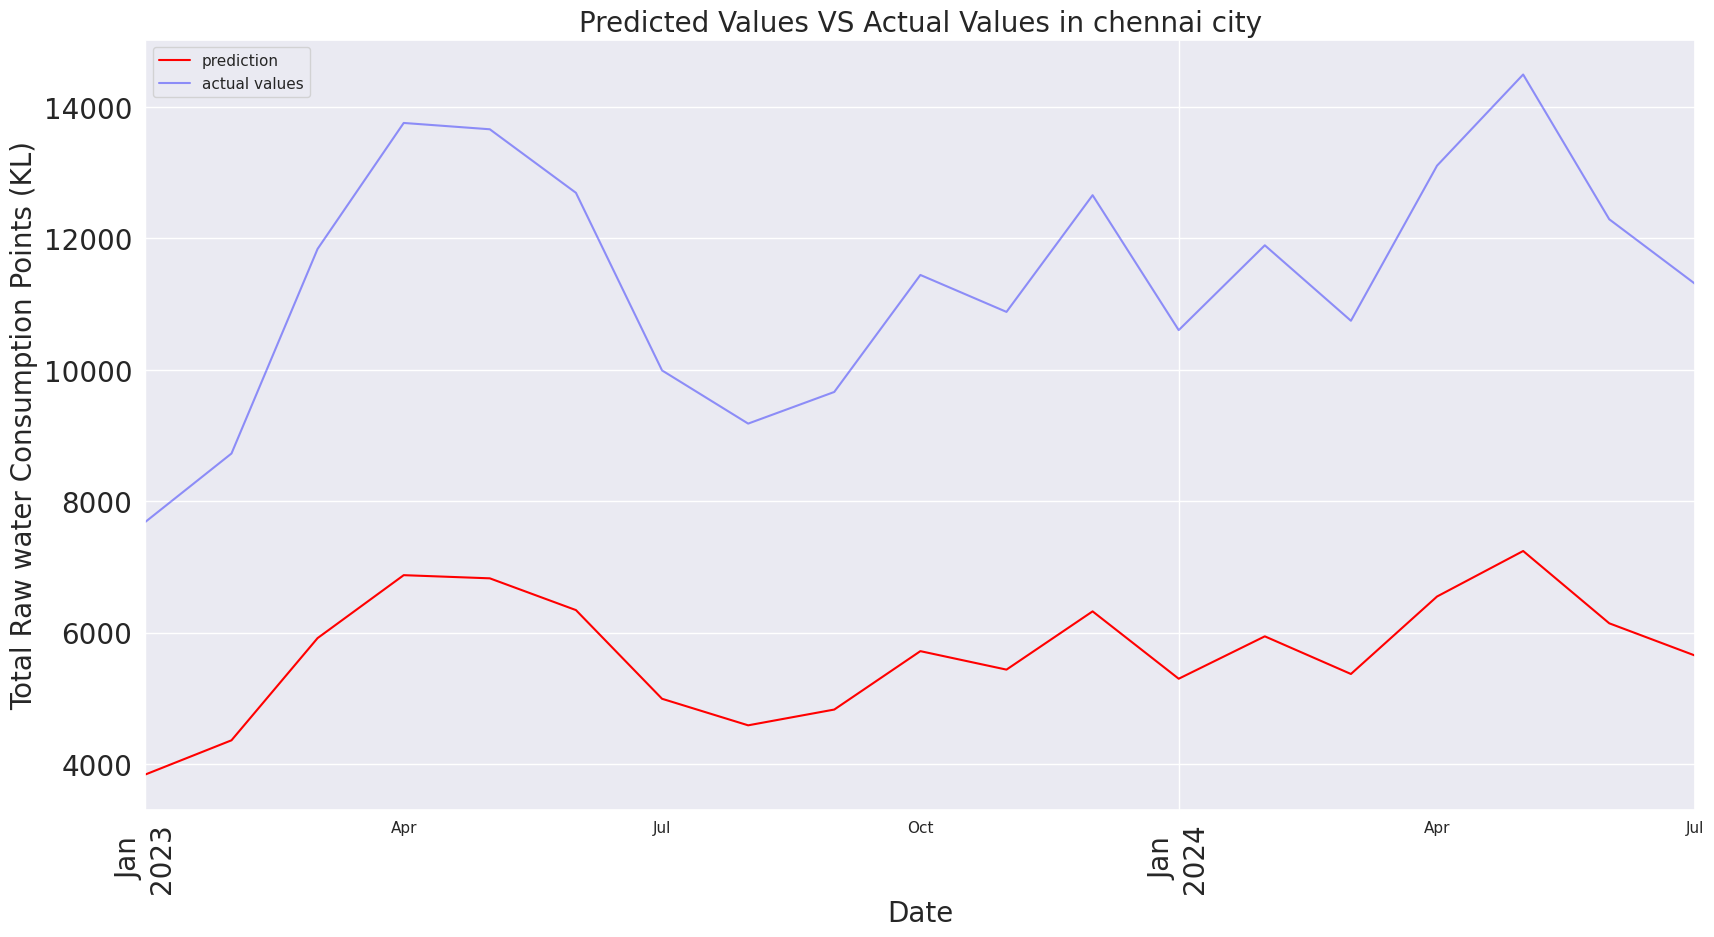

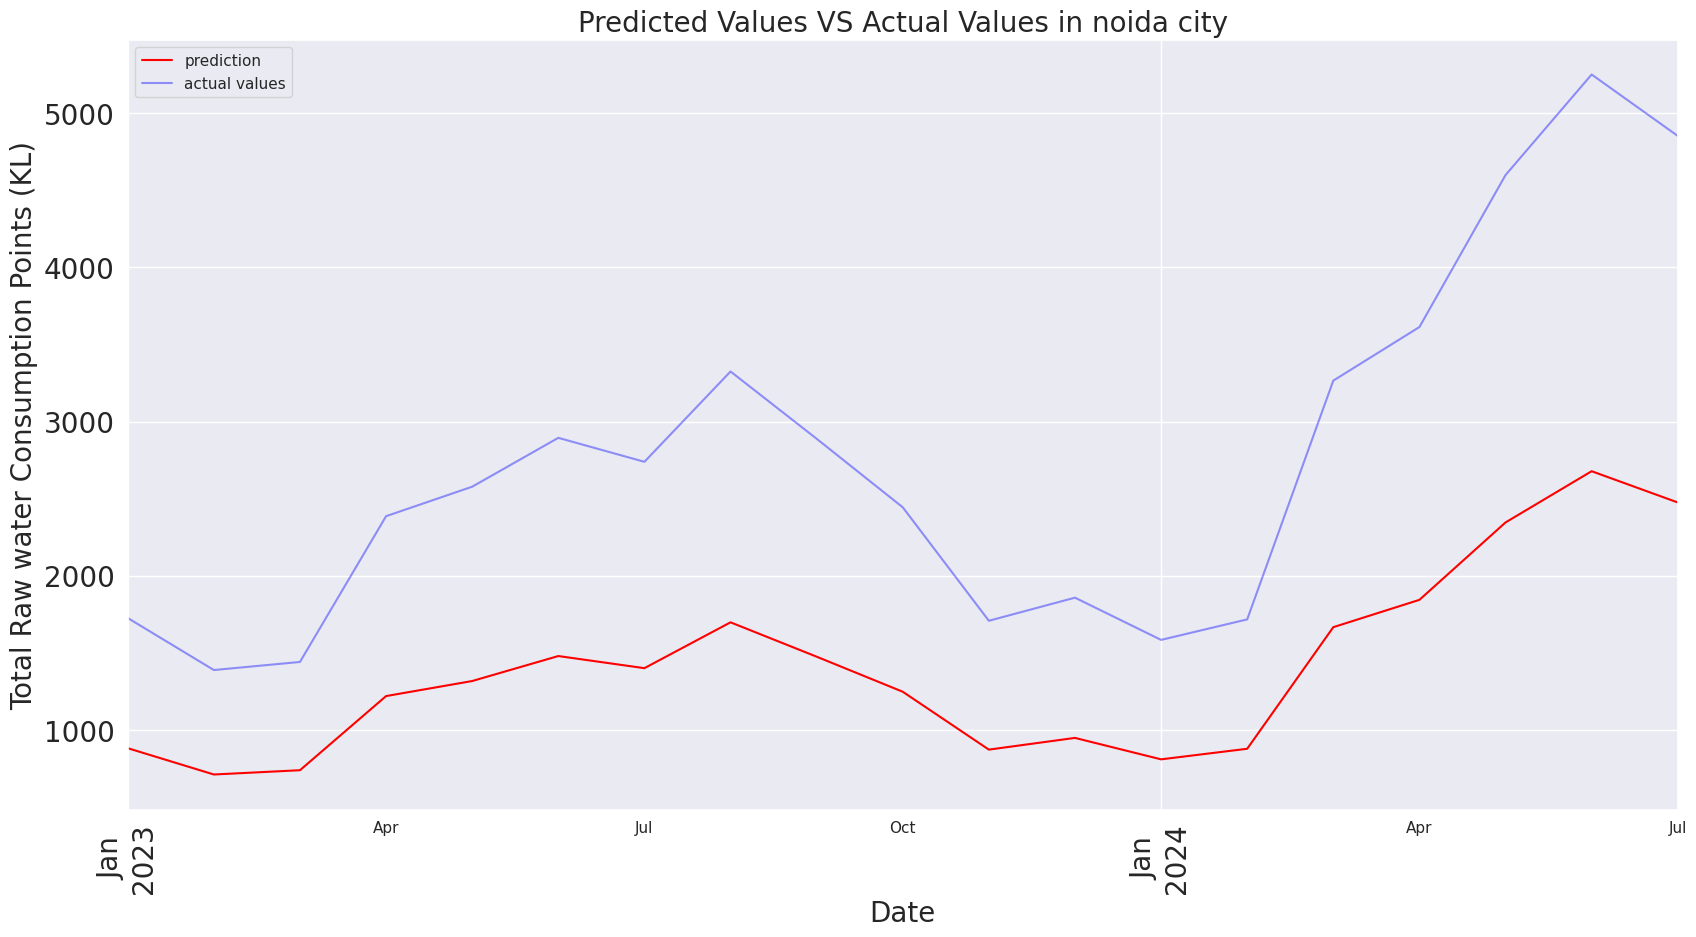

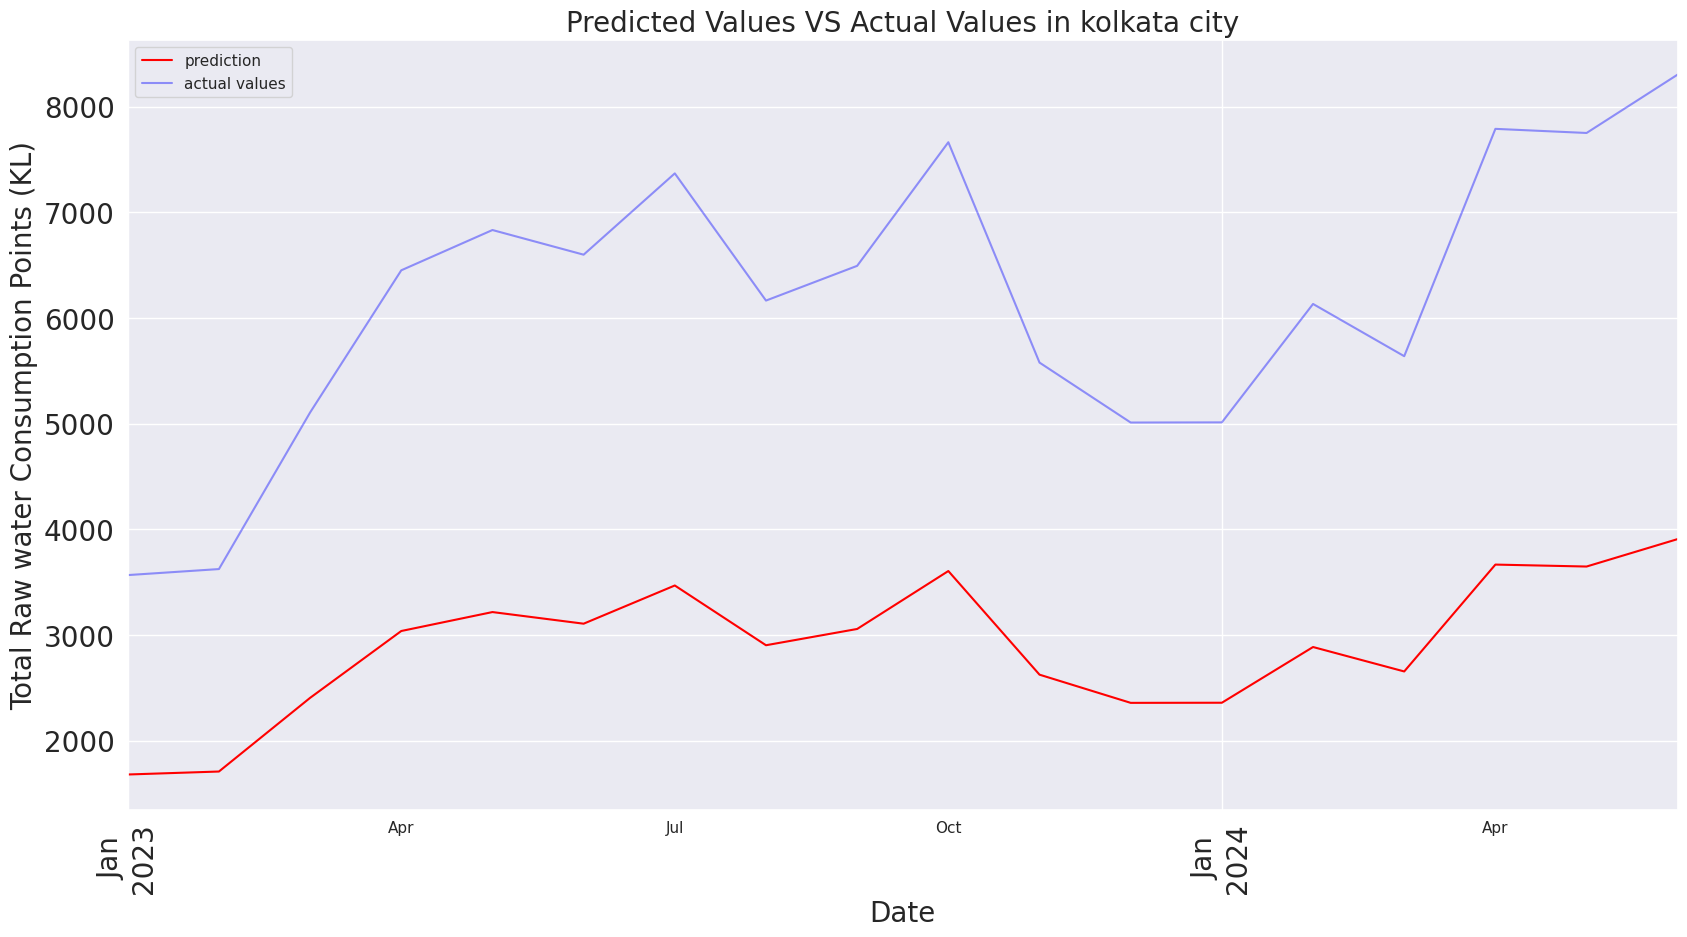

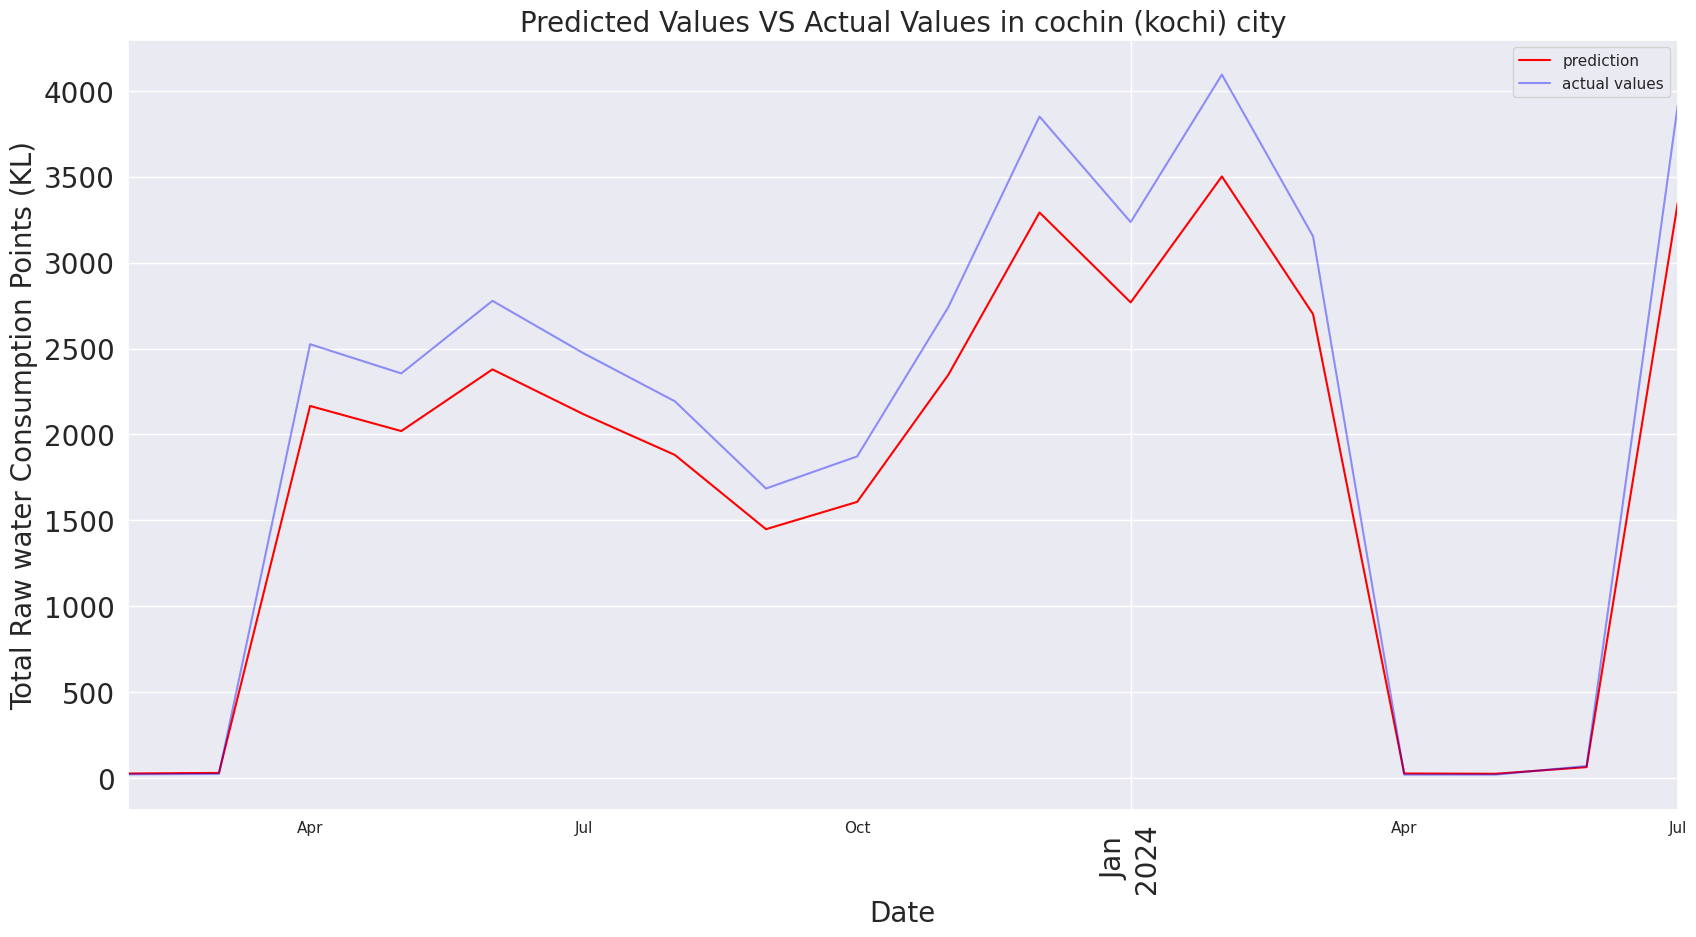

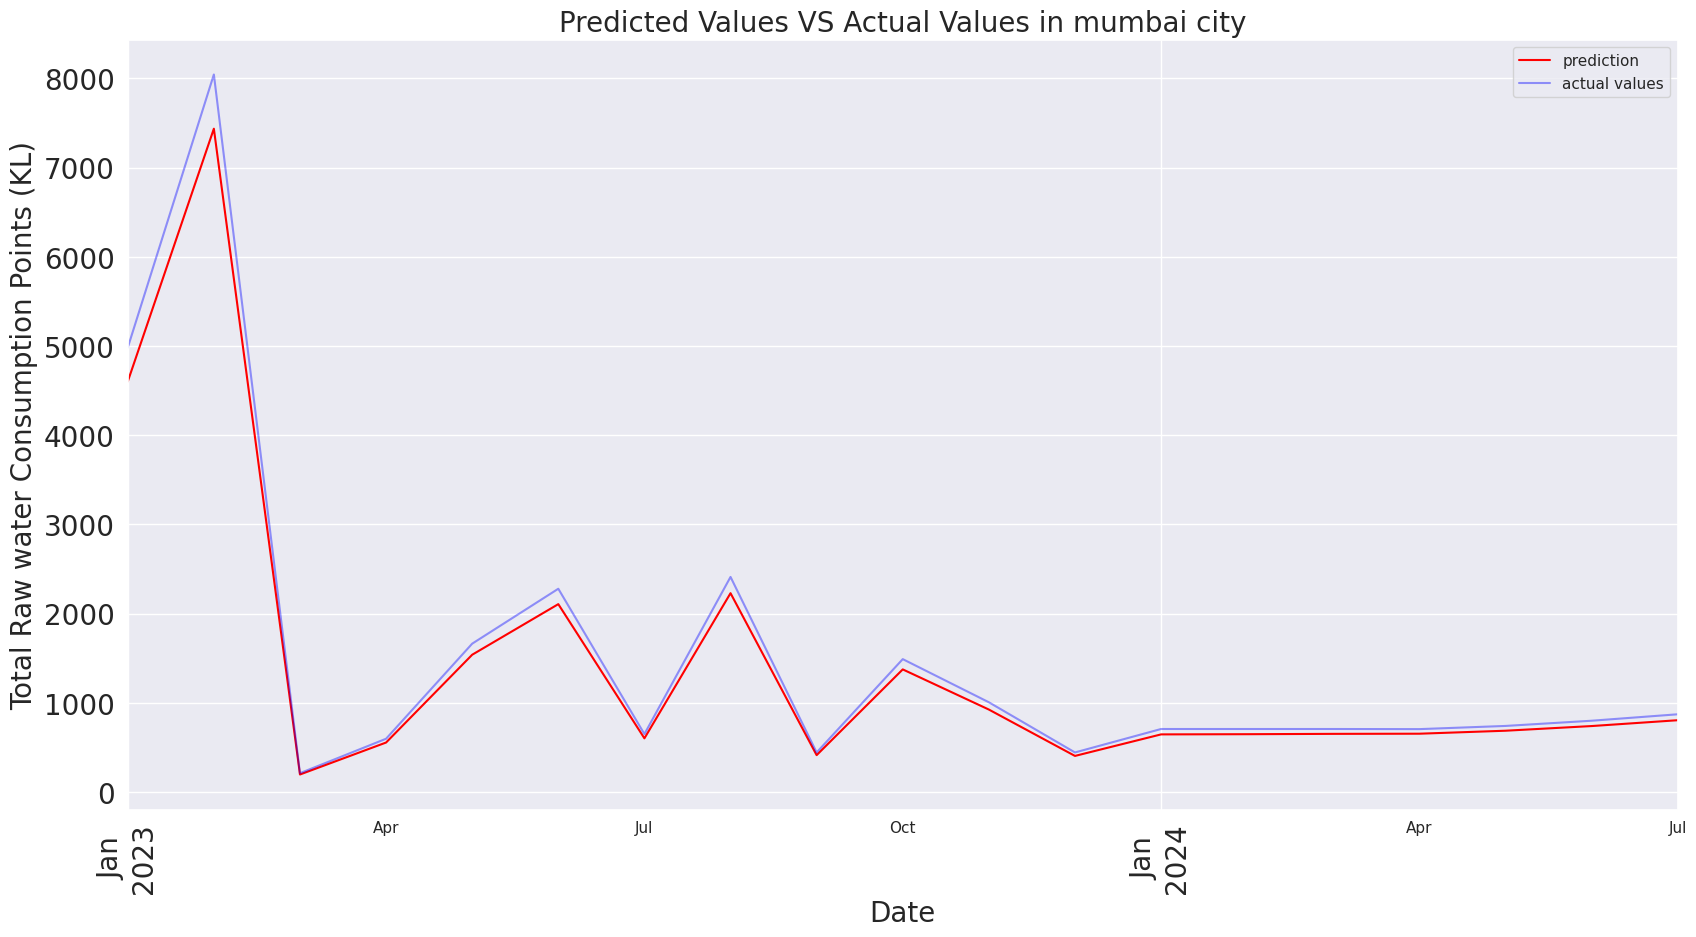

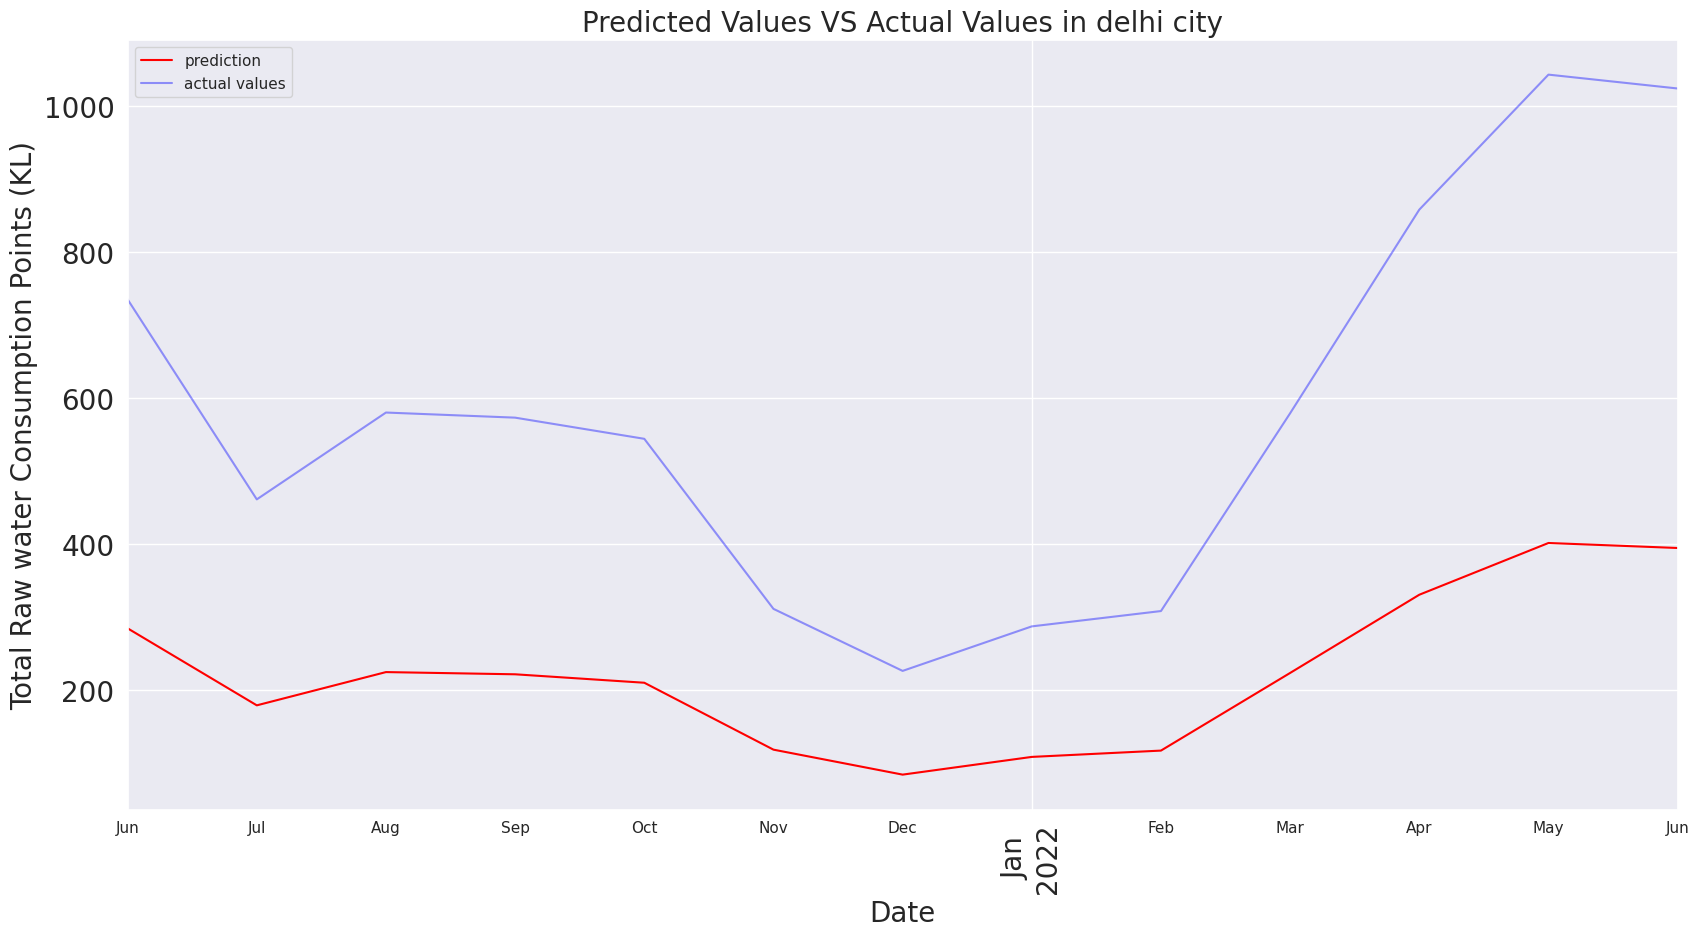

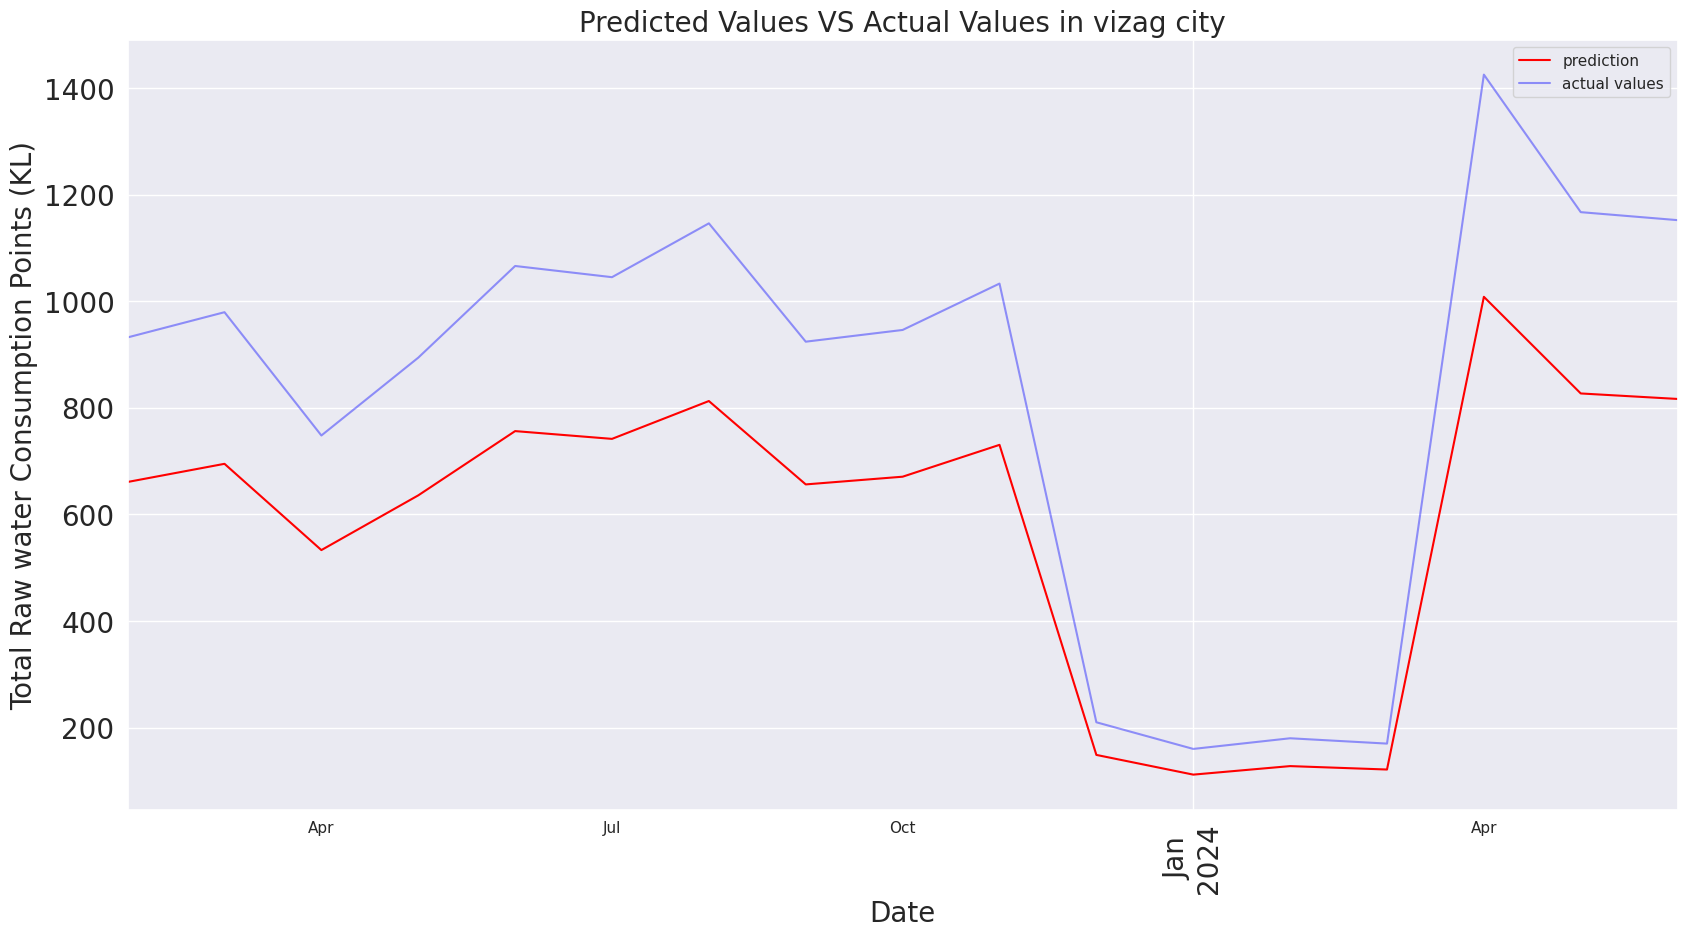

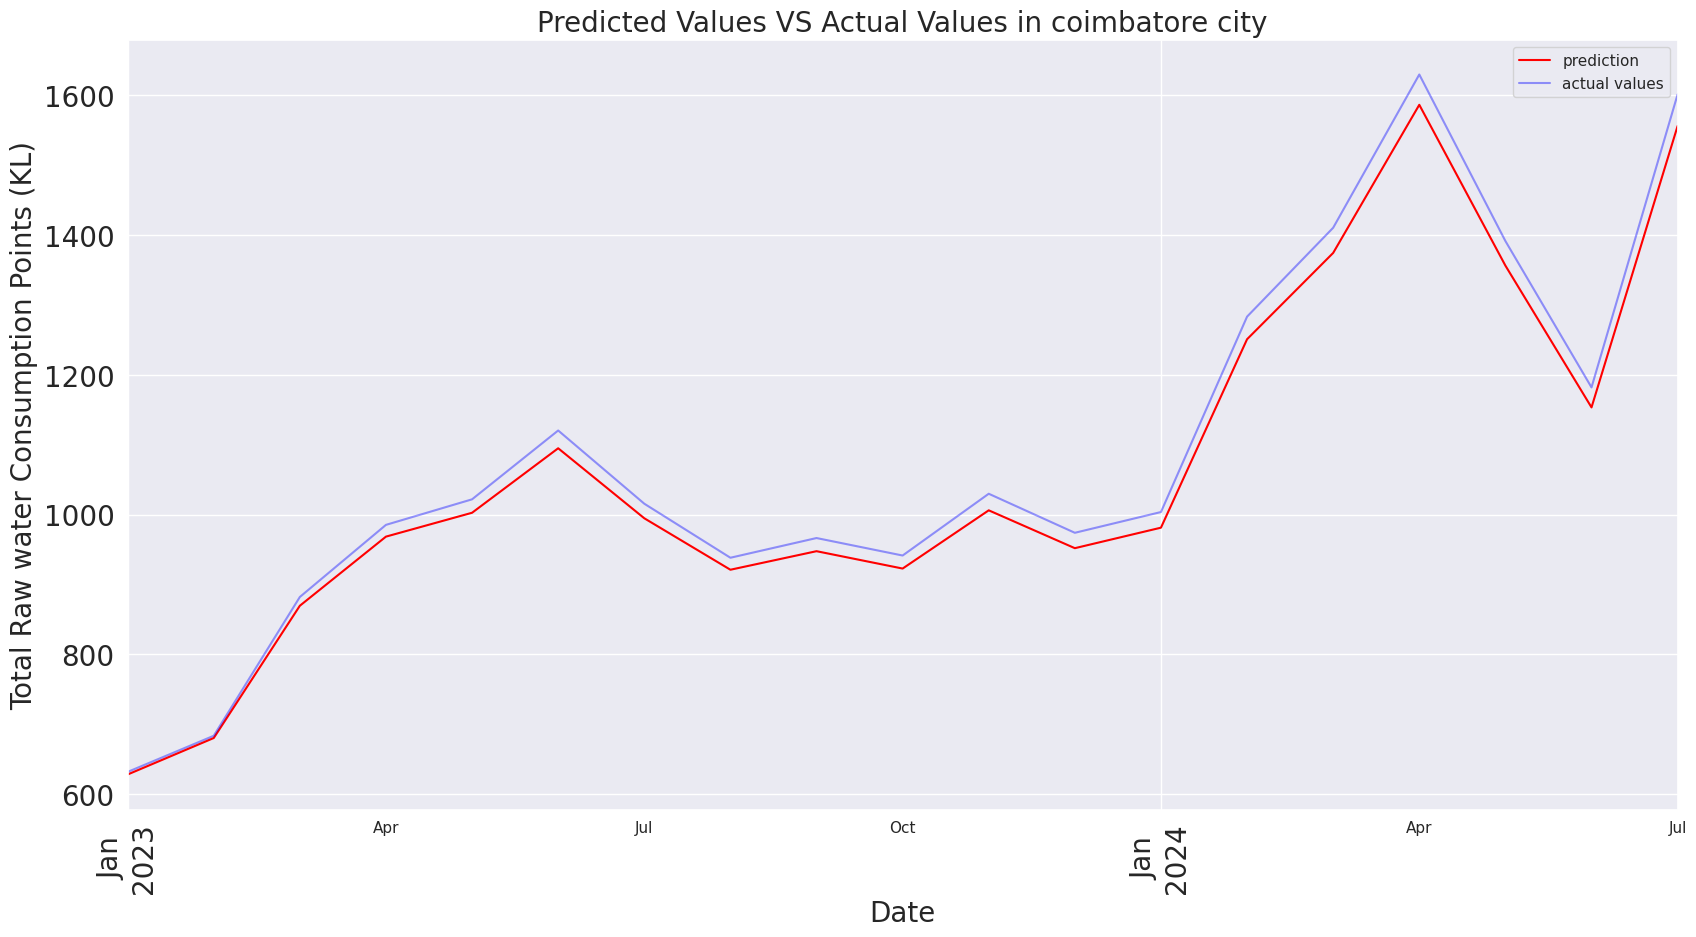

In [43]:
#loop thourgh 10 cities
for i in range(len(top_10_cities_names)):
    # Obtain one city's data
    City_copy = new_data[new_data.City == top_10_cities_names[i]]

    # Train-test split, normalization, and reshape the data
    x_train, x_test, y_train, y_test = normalization_train_test_split(City_copy)

    # Model
    model = Sequential()
    model.add(LSTM(60, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # Fit network
    history = model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=0, shuffle=False)

    # Make a prediction
    y_test_pre = model.predict(x_test)
    print('{} - RMSE: {}'.format(top_10_cities_names[i], RMSE(y_test[:-1], [i[0] for i in y_test_pre][1:])))

    # Create new dataframe for plot
    pa = pd.DataFrame()
    pa['Date'] = list(City_copy.Date.iloc[int(len(City_copy) * 0.8):])[1:-1]
    pa['Prediction'] = [i[0] for i in y_test_pre][1:]
    pa['Actual Values'] = list(y_test[:-1])

    plt.figure(figsize=(20, 10))
    pa.groupby('Date')['Prediction'].sum().plot(kind='line', label='prediction', color='red', alpha=1)
    pa.groupby("Date")['Actual Values'].sum().plot(kind='line', label='actual values', color='blue', alpha=0.4)
    plt.xticks(rotation=90, size=20)
    plt.yticks(size=20)

    plt.ylabel('Total Raw water Consumption Points (KL)', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.title('Predicted Values VS Actual Values in {}'.format(top_10_cities_names[i]), fontsize=20)
    plt.legend()
